In [3]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
from small_script.myFunctions import *
from collections import defaultdict
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
plt.rcParams['figure.figsize'] = np.array([16.18033, 10])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

In [109]:
pre = "/Users/weilu/Research/server/feb_2020/mass_iterative_run/"
data = pd.read_csv(f"{pre}/training_set.csv")
specific_decoys = data.query("Length < 150 and Length > 70").reset_index(drop=True)
pdb_list = specific_decoys["Protein"].to_list()
pdb_list = [a.lower() for a in pdb_list]

In [120]:
skip_pdb_list = ["1puc", "1skz"]
skip_pdb_list += ["1msc", "1fmb", "1gvp", "2tgi", "1whi", "1baj", "1rmd", "1div"]  #dimer.
skip_pdb_list += ["1aqe"]  # lots of ligand
filtered_pdb_list = [x for x in pdb_list if x not in skip_pdb_list]
pdb_list = filtered_pdb_list

In [121]:
len(filtered_pdb_list)

88

In [127]:

simulationType = "mass_iterative_run"
run_n = 2
folder_list = ["iteration_0_cbd", "iteration_1_cbd", "iteration_2_cbd", "iteration_start_native", "iteration_start_native_iter2"]
folder_list = ["iteration_0_cbd", "iteration_start_native", "iteration_start_native_iter2", 
               "iteration_start_native_iter3", "iteration_new_1", 
               "iteration_start_native_iter4", "iteration_start_native_iter5", "iteration_new_1"]
folder_list = ["iteration_0_cbd", "iteration_start_native", "iteration_new_1", 
               "iteration_start_native_iter4", "iteration_start_native_iter5", "iteration_new_2", "iteration_new_3", "iteration_new_4"]

all_data = []

for folder in folder_list:
    for pdb in pdb_list:
        for i in range(run_n):
                pre = f"/Users/weilu/Research/server/mar_2020/{simulationType}/{folder}/{pdb}/{i}"
                info_file = "info.dat"
                location = f"{pre}/{info_file}"
                try:
                    tmp = pd.read_csv(location, sep="\s+")
                    tmp = tmp.assign(Run=i, Protein=pdb, Folder=folder)
                    all_data.append(tmp)
                except:
                    print(pdb, i, folder)
                    pass
data = pd.concat(all_data)
today = datetime.today().strftime('%m-%d')
outFile = f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{today}.csv"
data.reset_index(drop=True).to_csv(outFile)
print(outFile)

/Users/weilu/Research/data/openMM/mass_iterative_run_iteration_new_4_03-16.csv


In [128]:
# data = pd.read_csv("/Users/weilu/Research/data/openMM/mass_iterative_run_iteration_0_02-07.csv", index_col=0)
# data = pd.read_csv("/Users/weilu/Research/data/openMM/mass_iterative_run_iteration_1_02-10.csv", index_col=0)
# data = pd.read_csv("/Users/weilu/Research/data/openMM/mass_iterative_run_iteration_2_02-11.csv", index_col=0)
data = pd.read_csv("/Users/weilu/Research/data/openMM/mass_iterative_run_iteration_new_4_03-16.csv", index_col=0)

sub_pdb_list = pdb_list
data.Protein = pd.Categorical(data.Protein, 
                      categories=sub_pdb_list)

/Users/weilu/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [129]:
y = "Steps"
d = data
t = d.groupby(["Protein", "Folder", "Run"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data

LinAlgError: singular matrix

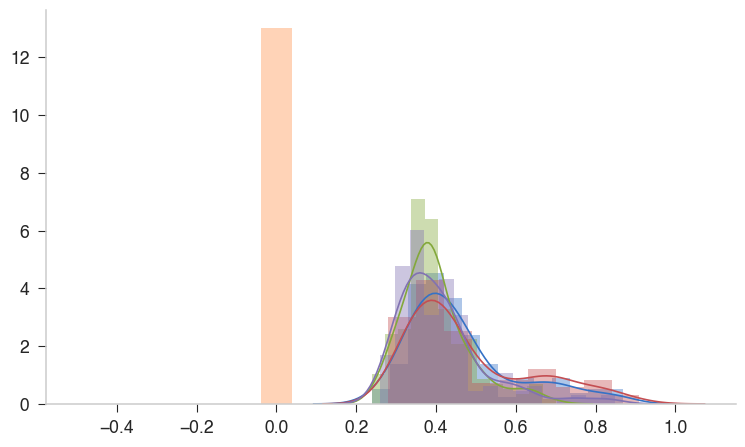

In [130]:
# sub_data = max_Q_data.query("Folder != 'iteration_start_native_iter4' and Folder != 'iteration_start_native' and Folder != 'iteration_new_3'")
g = sns.FacetGrid(sub_data, hue="Folder", height=5, aspect=1.618)
g = g.map(sns.distplot, "Q")
plt.legend()

In [132]:
sub_data.sort_values("Q")

Steps     Q       Rg  Backbone    Rama  Contact  Fragment  Exclude_Side  \
1000   2001  0.00  1528.38     19.38 -284.53     0.00      0.00          0.00   
1080   2001  0.00  1497.28     30.26 -578.17     0.00      0.00          0.00   
1081   2001  0.00  1408.86     27.75 -579.69     0.00      0.00          0.00   
120    2001  0.00  1494.04     17.33 -171.92     0.00      0.00          0.00   
121    2001  0.00  1445.35     13.61 -233.44     0.00      0.00          0.00   
281    2001  0.00  1301.18     19.39 -305.73     0.00      0.00          0.00   
280    2001  0.00  1485.16     21.01 -294.15     0.00      0.00          0.00   
872    2001  0.00  1576.66     22.70 -202.31     0.00      0.00          0.00   
744    2001  0.00  1576.82     20.23 -237.27     0.00      0.00          0.00   
824    2001  0.00  1558.50     24.60 -339.52     0.00      0.00          0.00   
1257   2001  0.00  1547.39     24.72 -362.33     0.00      0.00          0.00   
825    2001  0.00  1396.11     29.66 -408.52     0.00      0.00          0.00   
488    2001  0.00  1590.64     18.47 -219.77     0.00      0.00          0.00   
1096   2001  0.00  1498.36     28.07 -343.20     0.00      0.00          0.00   
1097   2001  0.00  1510.40     26.58 -368.10     0.00      0.00          0.00   
537    2001  0.00  1480.24     25.27 -377.61     0.00      0.00          0.00   
1256   2001  0.00  1562.47     28.73 -421.31     0.00      0.00          0.00   
136    2001  0.00  1511.01     14.43 -206.52     0.00      0.00          0.00   
137    2001  0.00  1384.98     18.40 -205.31     0.00      0.00          0.00   
536    2001  0.00  1455.74     19.10 -327.10     0.00      0.00          0.00   
1272   2001  0.00  1523.83     38.16 -522.83     0.00      0.00          0.00   
265    2001  0.00  1391.35     13.44 -355.33     0.00      0.00          0.00   
552    2001  0.00  1492.55     24.87 -367.14     0.00      0.00          0.00   
745    2001  0.00  1527.25     26.52 -278.10     0.00      0.00          0.00   
1305   2001  0.00  1461.24     29.59 -609.10     0.00      0.00          0.00   
1304   2001  0.00  1442.65     32.79 -644.45     0.00      0.00          0.00   
313    2001  0.00  1615.06     26.02 -219.06     0.00      0.00          0.00   
1176   2001  0.00  1484.72     28.19 -395.32     0.00      0.00          0.00   
472    2001  0.00  1295.95     18.94 -424.47     0.00      0.00          0.00   
1289   2001  0.00  1425.95     25.85 -609.47     0.00      0.00          0.00   
...     ...   ...      ...       ...     ...      ...       ...           ...   
510     251  0.86    13.16    156.53 -485.45  -213.79   -423.21         14.83   
95      251  0.86    11.44    125.86 -226.79  -164.47   -338.54          8.87   
90      251  0.86    11.58    121.28 -232.55  -162.65   -327.99         11.92   
906     251  0.86    15.10    185.24 -481.81  -247.91   -565.24         27.48   
173     251  0.87    11.23    131.49 -498.89  -142.61   -351.97          7.45   
272    2001  0.87    11.49     92.42 -496.80  -157.26   -377.40          3.91   
225    2001  0.87    12.14     82.23 -443.90  -169.07   -390.61          9.64   
410     251  0.87    13.13    149.63 -350.07  -207.45   -433.50         14.03   
175     251  0.87    11.22    118.96 -503.41  -144.14   -353.10          7.39   
204     251  0.87    11.29    121.30 -464.27  -145.47   -350.23         10.88   
202     251  0.87    11.24    125.82 -470.19  -172.24   -350.47         12.10   
237     251  0.87    12.43    126.99 -442.39  -104.61   -376.05          9.19   
76      251  0.88    12.16    123.65 -370.08  -129.44   -329.95          8.97   
94      251  0.88    11.54    115.40 -223.03  -160.05   -329.77         12.11   
239     251  0.88    12.25    136.67 -434.49  -102.61   -368.80          7.73   
91      251  0.88    11.50    114.11 -229.07  -160.09   -324.09         10.92   
444     251  0.88    12.37    163.02 -690.27  -193.14   -462.39         14.98   
446     251  0.88    12.50    160.55 

In [108]:
sub_data.query("Folder == 'iteration_new_2'").sort_values("Q")

Steps     Q     Rg  Backbone     Rama  Contact  Fragment  Exclude_Side  \
1264   2001  0.28  20.36    150.91  -655.35  -193.59   -609.63         11.19   
677    2001  0.28  15.25    134.16  -388.56  -280.16   -468.93         12.52   
901    2001  0.28  14.82    136.72  -556.60  -282.37   -475.42         11.77   
425    2001  0.30  15.72    125.60  -533.89  -175.98   -407.92         13.74   
593    2001  0.30  15.73    123.31  -626.46  -255.99   -448.48          8.28   
831    2001  0.30  13.10    135.25  -538.83  -291.93   -460.68         16.96   
550    2001  0.31  12.87    113.91  -358.49  -257.37   -390.48         11.16   
1152   2001  0.31  14.19    138.97  -845.44  -268.03   -573.67         18.60   
676    2001  0.31  15.27    144.01  -385.68  -277.66   -487.08          9.43   
747    2001  0.31  15.07    131.80  -558.35  -259.80   -488.27          8.20   
1265   2001  0.32  27.33    153.08  -651.18  -205.24   -620.60         10.93   
284    2001  0.32  12.92     95.75  -324.45  -225.63   -334.97          7.30   
551    2001  0.32  13.55    117.47  -366.72  -250.59   -375.60         11.69   
565    2001  0.32  13.55    115.09  -604.71  -240.74   -448.69         14.14   
649    2001  0.32  14.35    127.08  -402.28  -283.69   -465.96         17.23   
928    2001  0.32  13.99    148.70  -599.40  -317.76   -478.15         14.31   
900    2001  0.32  15.22    134.79  -551.44  -277.44   -486.00         12.66   
998    2001  0.32  15.41    155.50  -851.49  -219.52   -552.79         14.98   
1055   2001  0.32  15.90    155.80  -543.07  -257.26   -593.61         15.08   
1054   2001  0.32  15.87    153.34  -556.12  -268.05   -582.17         21.34   
984    2001  0.33  14.56    141.50  -595.46  -309.20   -490.30          9.11   
1250   2001  0.33  19.40    134.72  -998.51  -209.49   -620.63         12.06   
929    2001  0.33  13.05    126.86  -596.24  -327.65   -489.71         16.45   
481    2001  0.33  14.07    117.53  -477.30  -233.79   -421.60         14.59   
1124   2001  0.33  14.45    143.90  -666.23  -353.19   -544.21         21.90   
1222   2001  0.34  15.96    147.81  -983.25  -243.76   -582.25          7.66   
355    2001  0.34  15.59    106.74  -443.76  -162.74   -398.70          8.52   
1027   2001  0.34  14.22    138.75  -751.87  -313.82   -531.55         16.56   
1040   2001  0.34  15.47    130.10  -599.19  -300.88   -520.08         14.58   
1096   2001  0.35  16.72    144.60  -800.89  -197.26   -619.64          9.05   
...     ...   ...    ...       ...      ...      ...       ...           ...   
186    2001  0.67  12.01     83.83  -467.31  -167.39   -347.05          8.33   
172    2001  0.67  16.90     83.23  -641.79   -63.77   -359.69          4.68   
1237   2001  0.68  14.24    161.41  -682.20  -315.35   -619.88         14.77   
915    2001  0.68  14.58    130.36  -828.01  -229.79   -557.15         11.83   
1166   2001  0.69  18.85    130.76 -1124.92  -170.22   -671.62          8.97   
1236   2001  0.69  14.02    145.65  -678.39  -325.58   -614.34         18.53   
158    2001  0.69  11.17     86.99  -507.68  -146.03   -351.33          7.38   
914    2001  0.69  14.29    142.25  -837.88  -219.13   -562.77         12.41   
383    2001  0.70  12.69    108.26  -668.03  -189.30   -438.96          9.71   
187    2001  0.71  11.56     80.02  -466.04  -158.14   -352.50          5.56   
61     2001  0.71  11.37     82.44  -310.27  -128.46   -327.11          6.56   
47     2001  0.72  12.93     84.90  -425.25   -84.48   -294.83          7.01   
887    2001  0.72  13.59    127.83  -794.34  -211.99   -563.52          7.19   
382    2001  0.72  13.07     99.31  -667.39  -191.80   -440.81         10.83   
1068   2001  0.73  14.26    148.00  -549.53  -201.81   -577.29         17.55   
1026   2001  0.74  13.65    133.62  -754.60  -293.32   -578.64         20.18   
943    2001  0.77  13.51    124.54  -634.02  -196.18   -551.95         13.86   
145    2001  0.78  11.98     76.96  -281.84  -159.84   -324.28          5.77   
102   

In [100]:
sub_data.query("Folder == 'iteration_start_native_iter5'").sort_values("Q")

Steps     Q     Rg  Backbone     Rama  Contact  Fragment  Exclude_Side  \
573     251  0.42  13.96    158.56  -583.02  -227.37   -449.44         10.23   
586     251  0.44  13.75    184.31  -535.81  -231.13   -486.63          9.76   
587     251  0.44  13.66    174.37  -523.61  -246.44   -483.52         16.57   
1146    251  0.44  18.67    193.95  -900.15  -154.08   -593.40         13.13   
1273    251  0.45  22.08    218.55  -634.58  -182.14   -633.87         14.84   
1258    251  0.45  22.27    204.68  -977.26  -176.80   -620.43         12.65   
628     251  0.45  14.60    158.82  -897.95  -179.39   -461.79         12.30   
265     251  0.46  12.19    130.04  -496.72  -196.82   -356.50          8.19   
40      251  0.46  12.86    101.36  -414.63  -135.61   -276.66          3.95   
1259    251  0.47  20.97    224.68  -984.72  -184.83   -613.77         13.36   
993     251  0.47  14.29    186.91  -584.07  -264.56   -510.26          9.18   
992     251  0.47  14.46    206.61  -589.94  -273.28   -501.29         14.40   
1272    251  0.48  22.66    205.66  -629.93  -180.74   -626.78         13.83   
881     251  0.49  16.36    177.90  -836.37  -183.95   -523.29          8.82   
600     251  0.50  14.64    183.64  -613.90  -232.26   -466.55         10.65   
601     251  0.50  14.82    185.53  -609.27  -230.04   -453.34         11.02   
1119    251  0.50  15.94    198.13  -887.22  -236.46   -614.16         15.52   
1049    251  0.50  14.42    182.86  -581.99  -266.11   -541.88         16.00   
1216    251  0.51  15.50    195.02 -1103.28  -239.44   -612.59         15.45   
1118    251  0.51  15.90    205.27  -894.62  -233.84   -608.96         19.95   
208     251  0.51  12.79    123.71  -401.77  -130.64   -335.93          6.13   
741     251  0.52  16.17    192.45  -838.01  -127.06   -543.52         11.59   
726     251  0.52  14.52    176.96  -577.72  -193.99   -491.49          5.39   
1147    251  0.52  17.96    211.19  -875.34  -139.76   -607.03         12.26   
41      251  0.52  11.17    108.97  -413.10  -152.09   -265.56          6.22   
474     251  0.52  13.56    154.74  -472.51  -185.80   -398.58          9.28   
880     251  0.52  15.45    184.65  -829.33  -197.53   -509.28          9.79   
908     251  0.53  13.87    176.12  -531.72  -248.74   -505.45         24.71   
475     251  0.53  12.94    170.79  -464.97  -186.52   -399.72          7.72   
629     251  0.54  14.73    171.51  -898.89  -175.24   -470.35         10.94   
...     ...   ...    ...       ...      ...      ...       ...           ...   
614     251  0.81  12.07    171.06  -777.16  -182.25   -506.70         16.40   
83      251  0.81  12.14    105.40  -365.98  -127.97   -325.27         12.73   
699     251  0.81  14.98    180.45  -500.65  -204.19   -527.70         19.40   
853     251  0.81  13.12    168.12  -639.39  -199.75   -534.47         21.23   
1160    251  0.81  13.43    223.82  -802.57  -234.81   -594.07         20.58   
712     251  0.81  15.77    168.63  -595.31  -183.12   -501.13         16.16   
1035    251  0.82  13.68    189.95  -734.43  -273.27   -564.87         15.04   
55      251  0.82  13.01    124.59  -406.66   -81.39   -316.46         14.64   
825     251  0.82  15.36    204.04  -475.87  -209.36   -566.51         21.02   
335     251  0.82  11.80    137.03  -528.68  -143.59   -414.05         18.59   
278     251  0.82  11.99    161.86  -394.46  -157.44   -384.01         16.42   
26      251  0.83  11.06    110.20  -192.55  -152.70   -292.59         10.16   
377     251  0.83  13.25    146.89  -352.45  -163.55   -425.76         11.72   
517     251  0.83  13.22    165.72  -558.56  -269.90   -431.47         14.20   
321     251  0.83  12.42    144.75  -224.82  -237.41   -397.74         14.02   
657     251  0.84  13.99    176.15  -396.02  -235.20   -491.67         12.43   
194     251  0.84  11.24    137.61  -468.31  -150.49   -359.79          9.29   
195     251  0.84  11.28    114.96  -468.26  -139.90   -355.54         10.35   
82    

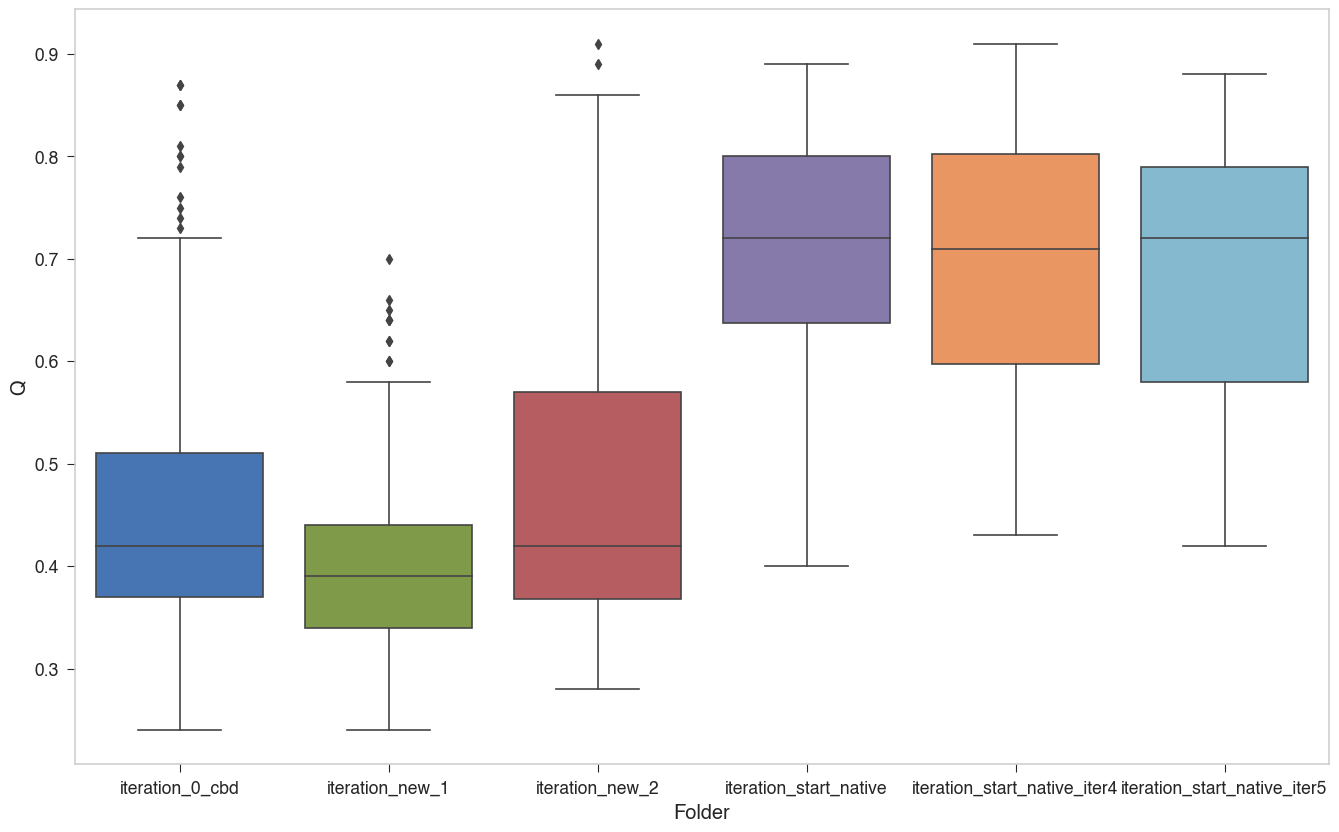

In [80]:
sns.boxplot("Folder", "Q", data=sub_data)

In [38]:
simulationType = "mass_iterative_run"
run_n = 2
folder_list = ["iteration_0_cbd", "iteration_1_cbd", "iteration_2_cbd", "iteration_start_native", "iteration_start_native_iter2"]
folder_list = ["iteration_0_cbd", "iteration_start_native", "iteration_start_native_iter2", 
               "iteration_start_native_iter3", "iteration_new_1"]


all_data = []

for folder in folder_list:
    for pdb in pdb_list:
        for i in range(run_n):
                pre = f"/Users/weilu/Research/server/mar_2020/{simulationType}/{folder}/{pdb}/{i}"
                info_file = "info.dat"
                location = f"{pre}/{info_file}"
                try:
                    tmp = pd.read_csv(location, sep="\s+")
                    tmp = tmp.assign(Run=i, Protein=pdb, Folder=folder)
                    all_data.append(tmp)
                except:
                    print(pdb, i, folder)
                    pass
data = pd.concat(all_data)
today = datetime.today().strftime('%m-%d')
outFile = f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{today}.csv"
data.reset_index(drop=True).to_csv(outFile)
print(outFile)

/Users/weilu/Research/data/openMM/mass_iterative_run_iteration_new_1_03-10.csv


In [39]:
# data = pd.read_csv("/Users/weilu/Research/data/openMM/mass_iterative_run_iteration_0_02-07.csv", index_col=0)
# data = pd.read_csv("/Users/weilu/Research/data/openMM/mass_iterative_run_iteration_1_02-10.csv", index_col=0)
# data = pd.read_csv("/Users/weilu/Research/data/openMM/mass_iterative_run_iteration_2_02-11.csv", index_col=0)
data = pd.read_csv("/Users/weilu/Research/data/openMM/mass_iterative_run_iteration_new_1_03-10.csv", index_col=0)

sub_pdb_list = pdb_list
data.Protein = pd.Categorical(data.Protein, 
                      categories=sub_pdb_list)

In [40]:
y = "Steps"
d = data
t = d.groupby(["Protein", "Folder", "Run"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data

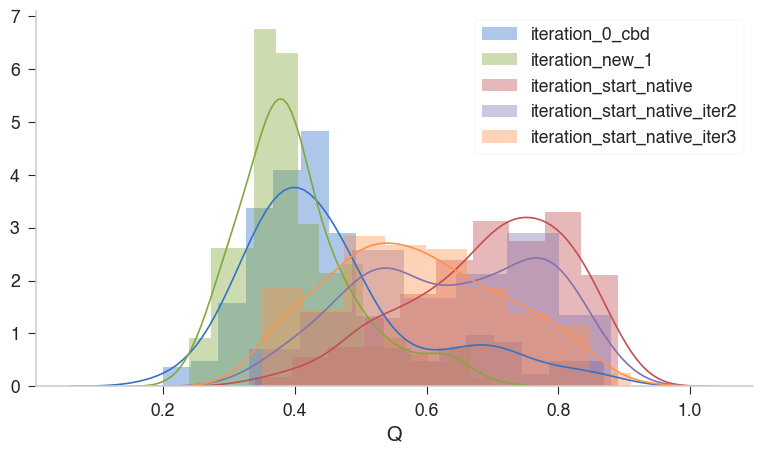

In [41]:
g = sns.FacetGrid(sub_data, hue="Folder", height=5, aspect=1.618)
g = g.map(sns.distplot, "Q")
plt.legend()

In [42]:
sub_data.query("Folder == 'iteration_start_native_iter3'").sort_values("Q")

Steps     Q     Rg  Backbone     Rama  Contact  Fragment  Exclude_Side  \
859    251  0.35  17.68    202.36  -971.96  -328.98   -549.92         10.71   
918    251  0.35  19.33    211.52 -1111.01  -261.76   -635.26          5.42   
599    251  0.35  17.08    172.64  -836.35  -245.93   -512.32         10.37   
968    251  0.35  16.65    204.11  -662.84  -320.27   -580.70          9.58   
699    251  0.36  17.54    184.43  -834.48  -245.55   -515.32          6.29   
929    251  0.37  15.54    226.69  -621.79  -353.08   -557.20         14.60   
598    251  0.38  16.89    179.09  -840.74  -255.74   -510.26         15.16   
978    251  0.38  21.56    207.30  -984.95  -299.63   -600.31         12.43   
858    251  0.38  16.72    187.36  -977.35  -323.86   -557.85         14.11   
758    251  0.38  15.09    204.86  -619.74  -248.22   -518.86          9.83   
309    251  0.38  14.20    166.17  -281.61  -304.65   -380.77          5.64   
979    251  0.38  21.40    220.64  -991.27  -288.93   -607.31          8.68   
848    251  0.38  17.24    197.07  -545.07  -227.36   -540.48         17.63   
969    251  0.39  15.99    231.09  -663.63  -322.92   -582.23          7.13   
928    251  0.39  15.59    213.93  -638.07  -348.46   -565.40         13.94   
478    251  0.39  14.85    168.63  -517.59  -293.80   -495.55         14.31   
639    251  0.40  14.91    193.85  -327.84  -273.03   -493.11         11.08   
308    251  0.40  14.92    169.85  -278.91  -307.50   -368.07          7.24   
988    251  0.41  27.72    229.26  -635.55  -193.79   -618.74          8.61   
269    251  0.41  16.52    157.95  -405.02  -203.58   -412.50         12.81   
28     251  0.41  13.89    109.28  -413.75  -157.85   -268.19          3.16   
638    251  0.41  15.00    198.52  -334.31  -271.98   -495.44          7.92   
759    251  0.41  15.75    182.87  -620.38  -243.13   -514.87         10.39   
769    251  0.42  15.04    214.21  -675.11  -303.10   -506.46          9.04   
158    251  0.43  13.96    142.19  -393.42  -173.08   -333.01          5.28   
508    251  0.43  15.64    153.02  -905.72  -215.82   -473.70          7.52   
849    251  0.43  16.99    185.66  -542.63  -218.94   -544.46         14.64   
688    251  0.43  15.57    197.53  -804.43  -231.66   -529.82          9.71   
378    251  0.43  13.28    162.70  -475.37  -237.12   -392.22          6.69   
549    251  0.44  13.89    164.43  -380.05  -321.23   -486.64         17.68   
..     ...   ...    ...       ...      ...      ...       ...           ...   
439    251  0.74  16.69    160.35  -503.04  -194.99   -468.27         13.83   
738    251  0.74  14.42    183.78  -812.24  -233.22   -558.91         15.28   
369    251  0.74  13.23    153.11  -490.06  -207.75   -403.74         13.14   
558    251  0.75  15.20    173.24  -503.77  -237.27   -518.25         15.07   
419    251  0.75  13.58    157.95  -568.80  -257.29   -416.12         11.05   
418    251  0.75  13.53    157.59  -563.80  -251.70   -433.42         11.23   
218    251  0.75  12.17    140.88  -322.26  -256.78   -362.50         13.94   
209    251  0.76  12.48    128.01  -397.74  -199.22   -374.56          8.82   
109    251  0.77  11.95    116.40  -271.55  -153.90   -314.73          7.90   
208    251  0.78  12.37    137.12  -394.60  -200.36   -378.04         11.62   
399    251  0.78  13.06    167.25  -458.64  -251.10   -452.50         17.92   
938    251  0.78  15.70    212.49  -618.86  -330.90   -587.74         21.64   
539    251  0.78  16.53    186.18  -545.87  -219.19   -493.78          9.88   
739    251  0.80  14.37    189.10  -809.88  -237.51   -567.03         14.93   
189    251  0.80  13.53    134.66  -478.13  -184.44   -363.47          7.58   
648    251  0.80  13.90    174.49  -646.58  -285.73   -509.38         14.52   
119    251  0.80  11.67    114.07  -506.10  -142.84   -346.21          4.67   
118    251  0.80  11.73    128.73  -507.52  -146.23   -349.60          5.30   
649    251  0.81  13.93    197.79  -641.70  -290.61   -

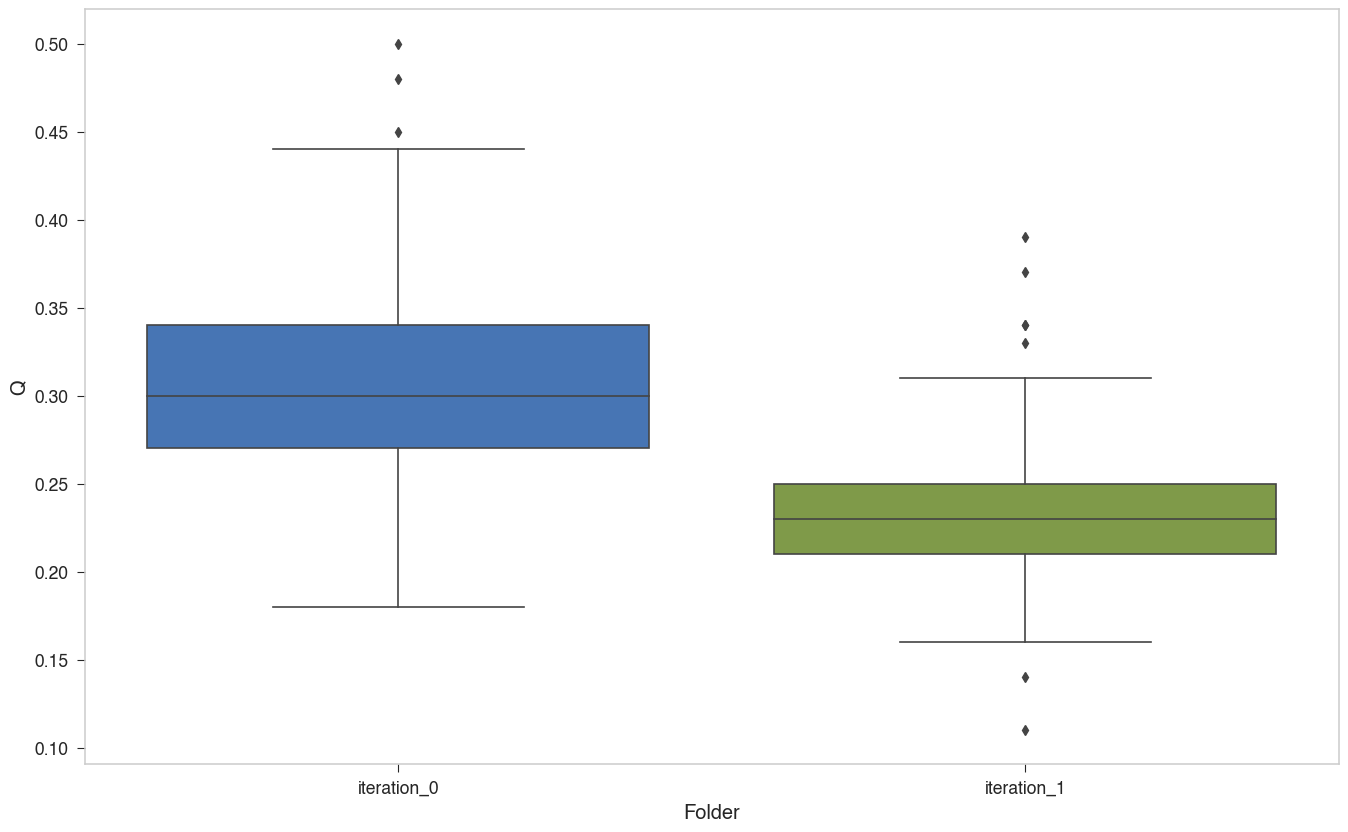

In [10]:
sns.boxplot("Folder", "Q", data=sub_data)

In [4]:
simulationType = "mass_iterative_run"
run_n = 1
folder_list = ["iteration_0", "iteration_1", "iteration_2", "iteration_3"]
all_data = []

for folder in folder_list:
    for pdb in pdb_list:
        for i in range(run_n):
                pre = f"/Users/weilu/Research/server/feb_2020/{simulationType}/{folder}/{pdb}/{i}"
                info_file = "info.dat"
                location = f"{pre}/{info_file}"
                try:
                    tmp = pd.read_csv(location, sep="\s+")
                    tmp = tmp.assign(Run=i, Protein=pdb, Folder=folder)
                    all_data.append(tmp)
                except:
                    print(pdb, i, folder)
                    pass
data = pd.concat(all_data)
today = datetime.today().strftime('%m-%d')
outFile = f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{today}.csv"
data.reset_index(drop=True).to_csv(outFile)
print(outFile)

/Users/weilu/Research/data/openMM/mass_iterative_run_iteration_3_02-17.csv


In [5]:
# data = pd.read_csv("/Users/weilu/Research/data/openMM/mass_iterative_run_iteration_0_02-07.csv", index_col=0)
# data = pd.read_csv("/Users/weilu/Research/data/openMM/mass_iterative_run_iteration_1_02-10.csv", index_col=0)
# data = pd.read_csv("/Users/weilu/Research/data/openMM/mass_iterative_run_iteration_2_02-11.csv", index_col=0)
data = pd.read_csv("/Users/weilu/Research/data/openMM/mass_iterative_run_iteration_3_02-17.csv", index_col=0)

sub_pdb_list = pdb_list
data.Protein = pd.Categorical(data.Protein, 
                      categories=sub_pdb_list)

In [6]:
y = "Steps"
d = data
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data

In [14]:
def distplot_fig(data, x, hue=None, row=None, col=None, legend=True, hist=False, **kwargs):
    """A figure-level distribution plot with support for hue, col, row arguments."""
    bins = kwargs.pop('bins', None)
    if (bins is None) and hist: 
        # Make sure that the groups have equal-sized bins
        bins = np.histogram_bin_edges(data[x].dropna())
    g = sns.FacetGrid(data, hue=hue, row=row, col=col)
    g.map(sns.distplot, x, bins=bins, hist=hist, **kwargs)
    if legend and (hue is not None) and (hue not in [x, row, col]):
        g.add_legend(title=hue) 
    return g   

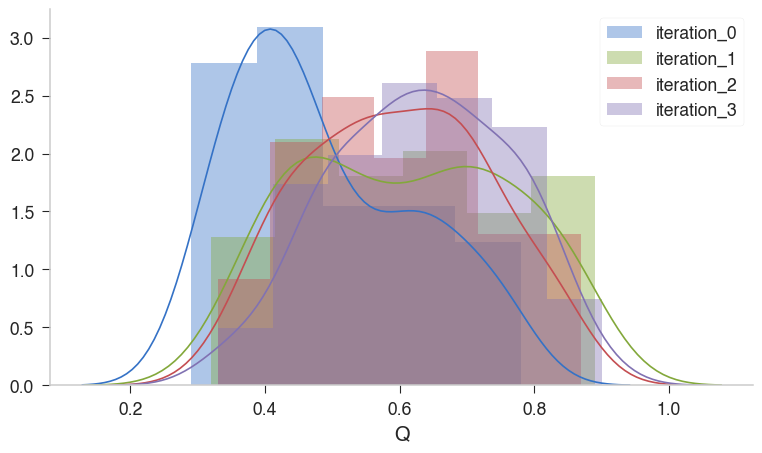

In [19]:
g = sns.FacetGrid(sub_data, hue="Folder", height=5, aspect=1.618)
g = g.map(sns.distplot, "Q")
plt.legend()

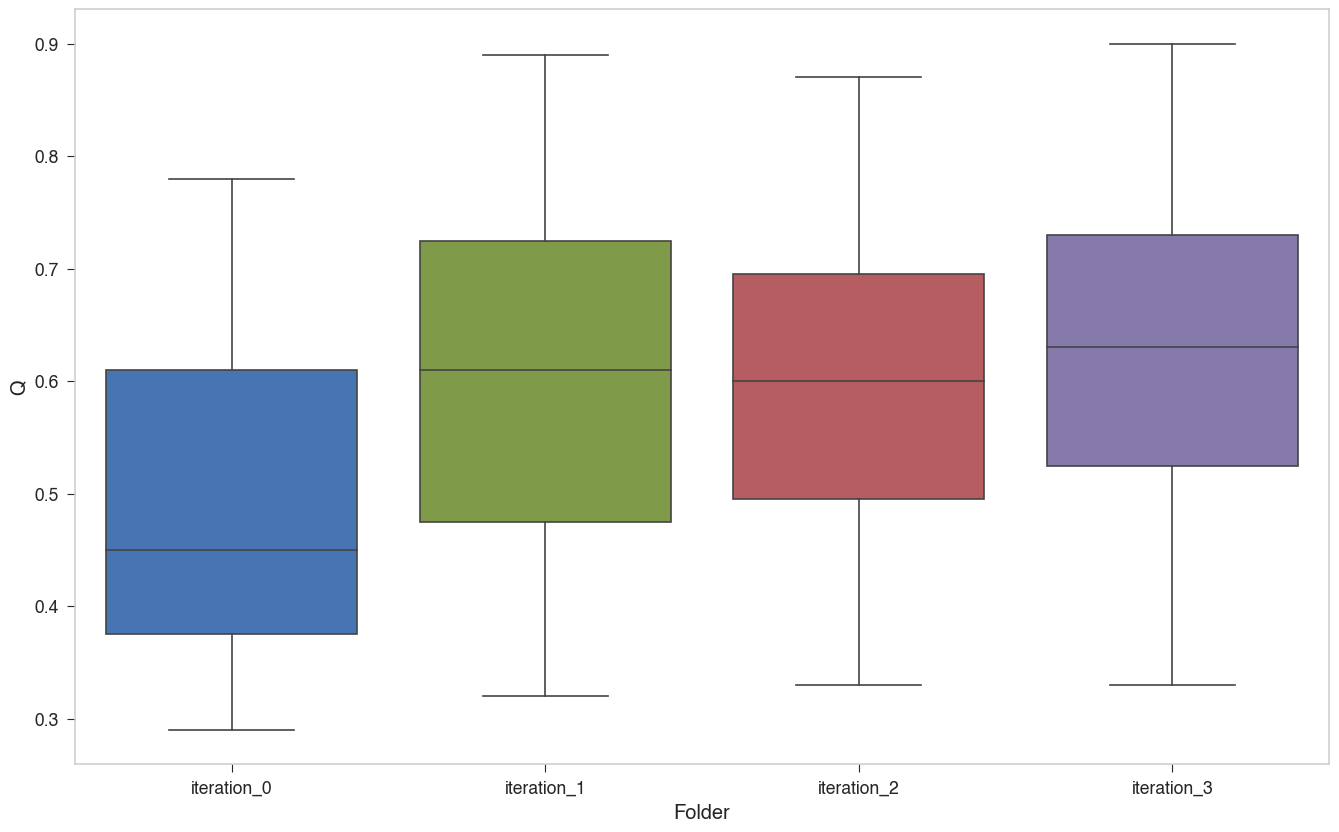

In [20]:
sns.boxplot("Folder", "Q", data=sub_data)

In [26]:
print(new_order)

['1PUC', '1HTP', '2ACY', '2MCM', '1ALY', '1C52', '2PII', '1BB9', '1KUH', '2TGI', '1BQK', '1CYO', '1RLW', '1AX8', '1FMB', '1BY9', '1FNA', '1KPF', '1POC', '1OPD', '1WHO', '1CC5', '1SKZ', '1RSS', '2SNS', '3CYR', '1B6E', '1MSC', '1AKR', '1OSA', '1BY2', '2END', '1BKF', '2CBP', '1BGF', '1CTJ', '1AQE', '3LZT', '1HMT', '1DIV', '1A6F', '1GVP', '1PLC', '1SFP', '1CXC', '1MAI', '2A0B', '1YCC', '1RMD', '1BTN', '1LBA', '1CRB', '1CPQ', '1PTF', '1DUN', '1VCC', '1MBA', '1WHI', '1KTE', '1OPC', '1LCL', '1PKP', '1A32', '451C', '1TIF', '3PYP', '1BEA', '1A1X', '2HBG', '1POA', '1RIE', '7RSA', '1HYP', '1FLP', '1RCB', '1BM8', '1OPY', '1AQT', '1DHN', '1TFE', '5NUL', '1PNE', '1VLS', '1JON', '1RZL', '1BFG', '2SAK', '1PDO', '1PHT', '1HOE', '1BAJ', '3VUB', '3CHY', '1ERV', '1TMY', '1NEU', '1TIG', '1BDO', '1TUL']


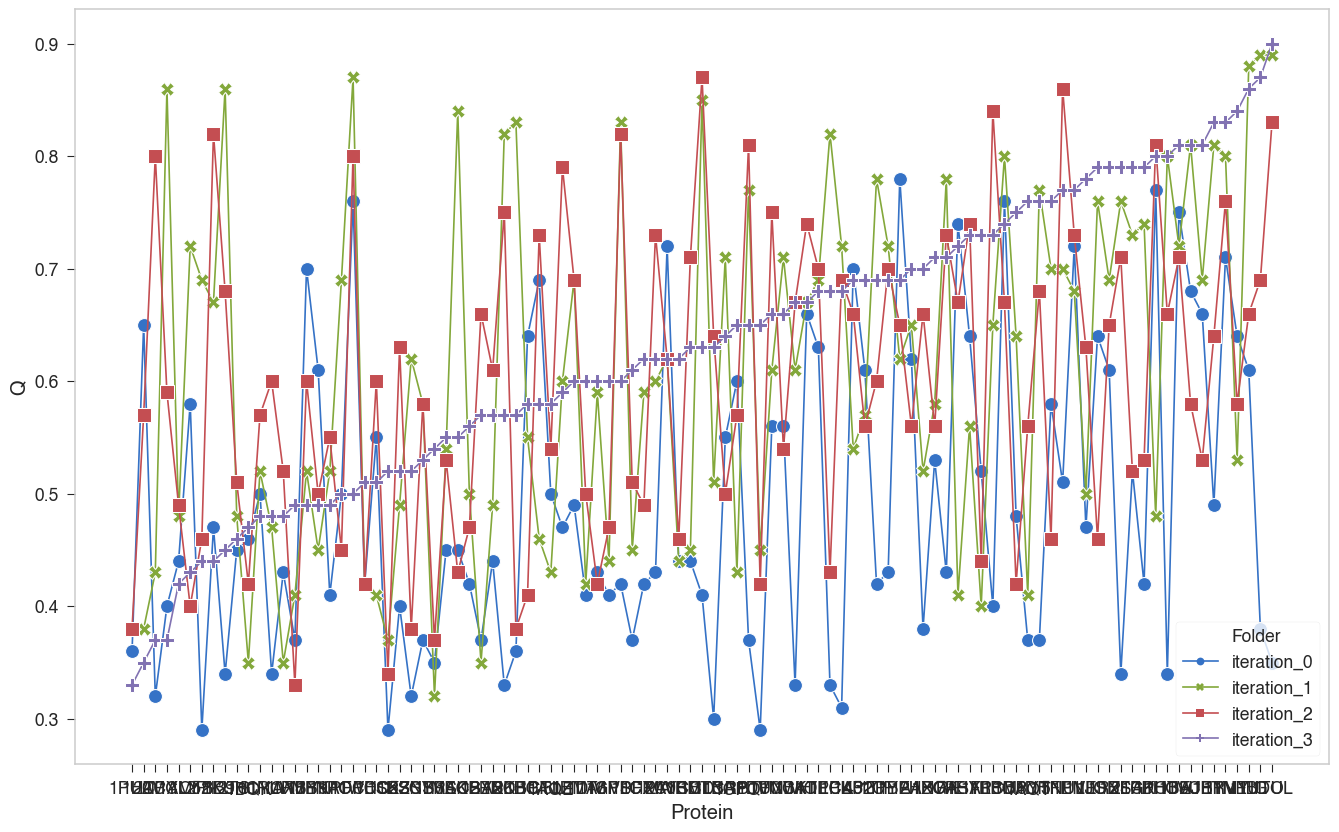

In [24]:
new_order = max_Q_data.query("Folder == 'iteration_3'").sort_values("Q")["Protein"].unique().to_list()
sub_data = max_Q_data.sort_values("Q").reset_index(drop=True).reset_index()
sub_data.Protein = sub_data.Protein.astype(str)
sub_data.Protein = pd.Categorical(sub_data.Protein, 
                      categories=new_order)
ax = sns.lineplot(x="Protein", y="Q", markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False, sort=True)

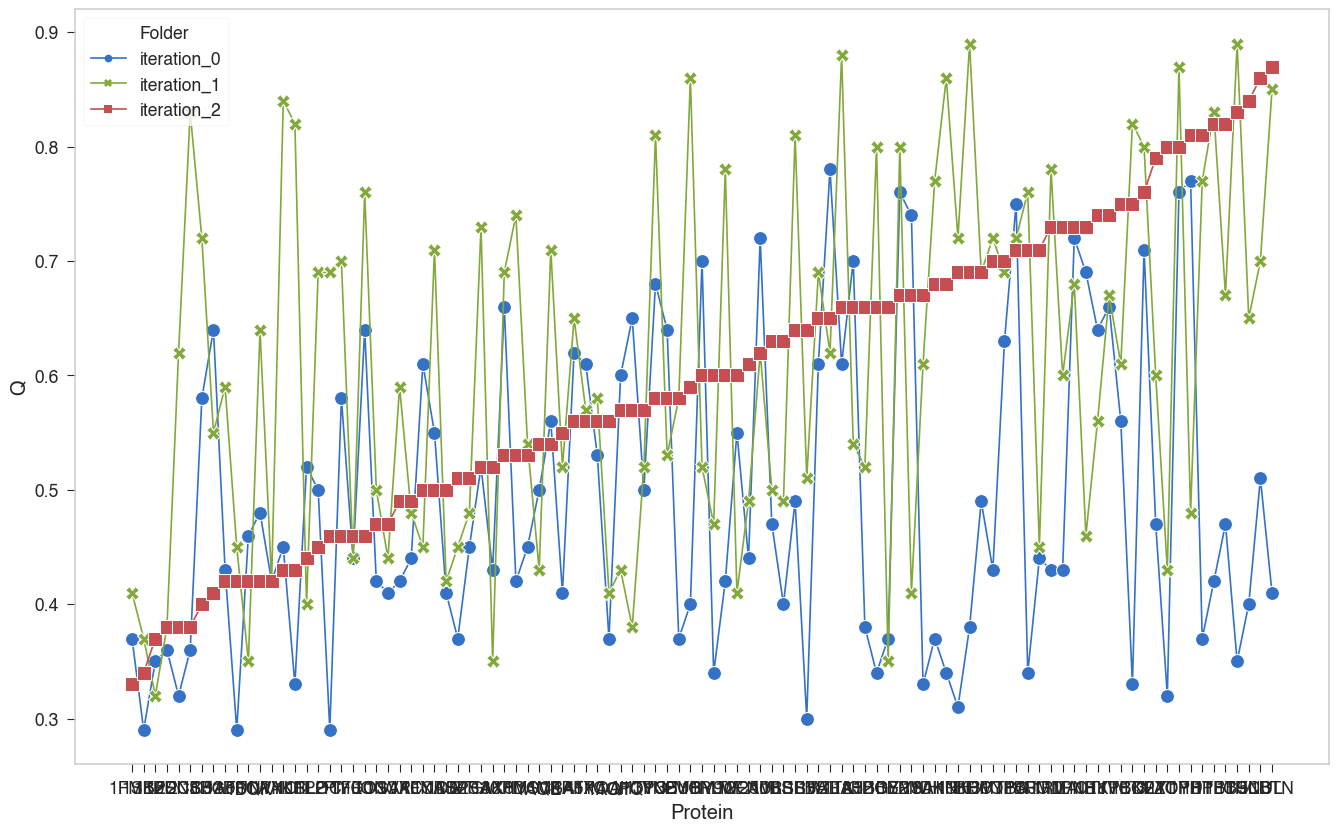

In [73]:
new_order = max_Q_data.query("Folder == 'iteration_2'").sort_values("Q")["Protein"].unique().to_list()
sub_data = max_Q_data.sort_values("Q").reset_index(drop=True).reset_index()
sub_data.Protein = sub_data.Protein.astype(str)
sub_data.Protein = pd.Categorical(sub_data.Protein, 
                      categories=new_order)
ax = sns.lineplot(x="Protein", y="Q", markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False, sort=True)

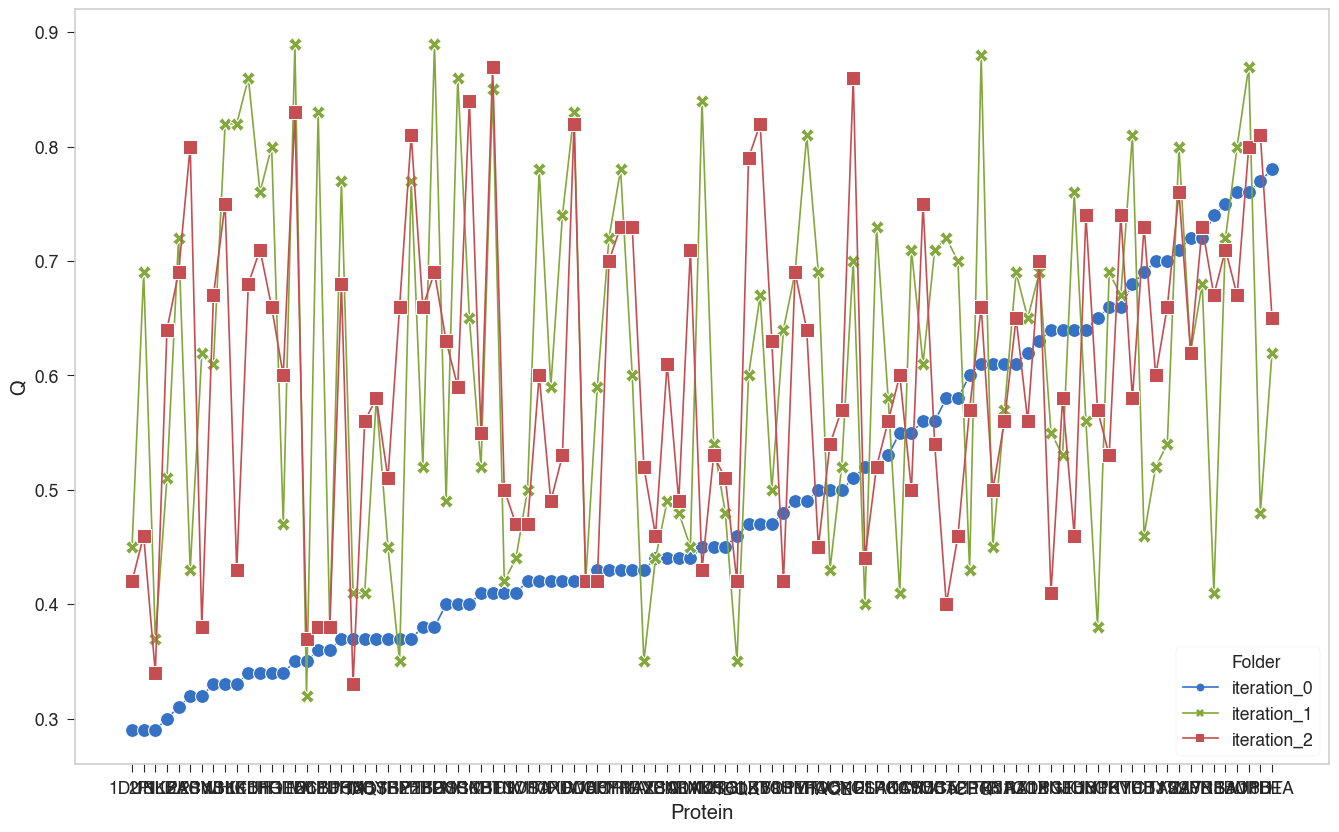

In [71]:
new_order = max_Q_data.query("Folder == 'iteration_0'").sort_values("Q")["Protein"].unique().to_list()
sub_data = max_Q_data.sort_values("Q").reset_index(drop=True).reset_index()
sub_data.Protein = sub_data.Protein.astype(str)
sub_data.Protein = pd.Categorical(sub_data.Protein, 
                      categories=new_order)
ax = sns.lineplot(x="Protein", y="Q", markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False, sort=True)

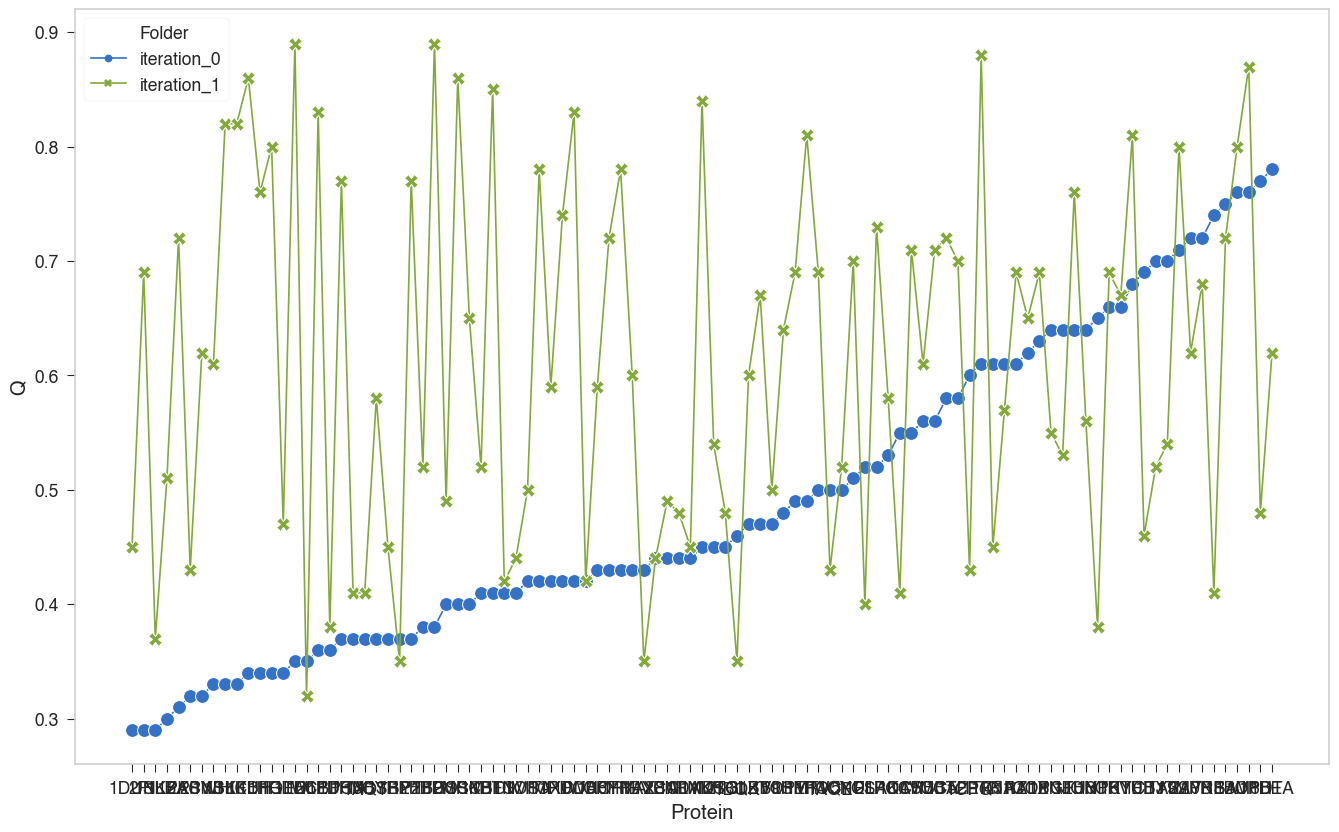

In [67]:
new_order = max_Q_data.query("Folder == 'iteration_0'").sort_values("Q")["Protein"].unique().to_list()
sub_data = max_Q_data.sort_values("Q").reset_index(drop=True).reset_index()
sub_data.Protein = sub_data.Protein.astype(str)
sub_data.Protein = pd.Categorical(sub_data.Protein, 
                      categories=new_order)
ax = sns.lineplot(x="Protein", y="Q", markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False, sort=True)

In [47]:
y = "Q"
d = data
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data

In [50]:
new_order = max_Q_data.query("Folder == 'iteration_0'").sort_values("Q")["Protein"].unique().to_list()

In [59]:
sub_data = max_Q_data.sort_values("Q").reset_index(drop=True).reset_index()
sub_data.Protein = sub_data.Protein.astype(str)
sub_data.Protein = pd.Categorical(sub_data.Protein, 
                      categories=new_order)

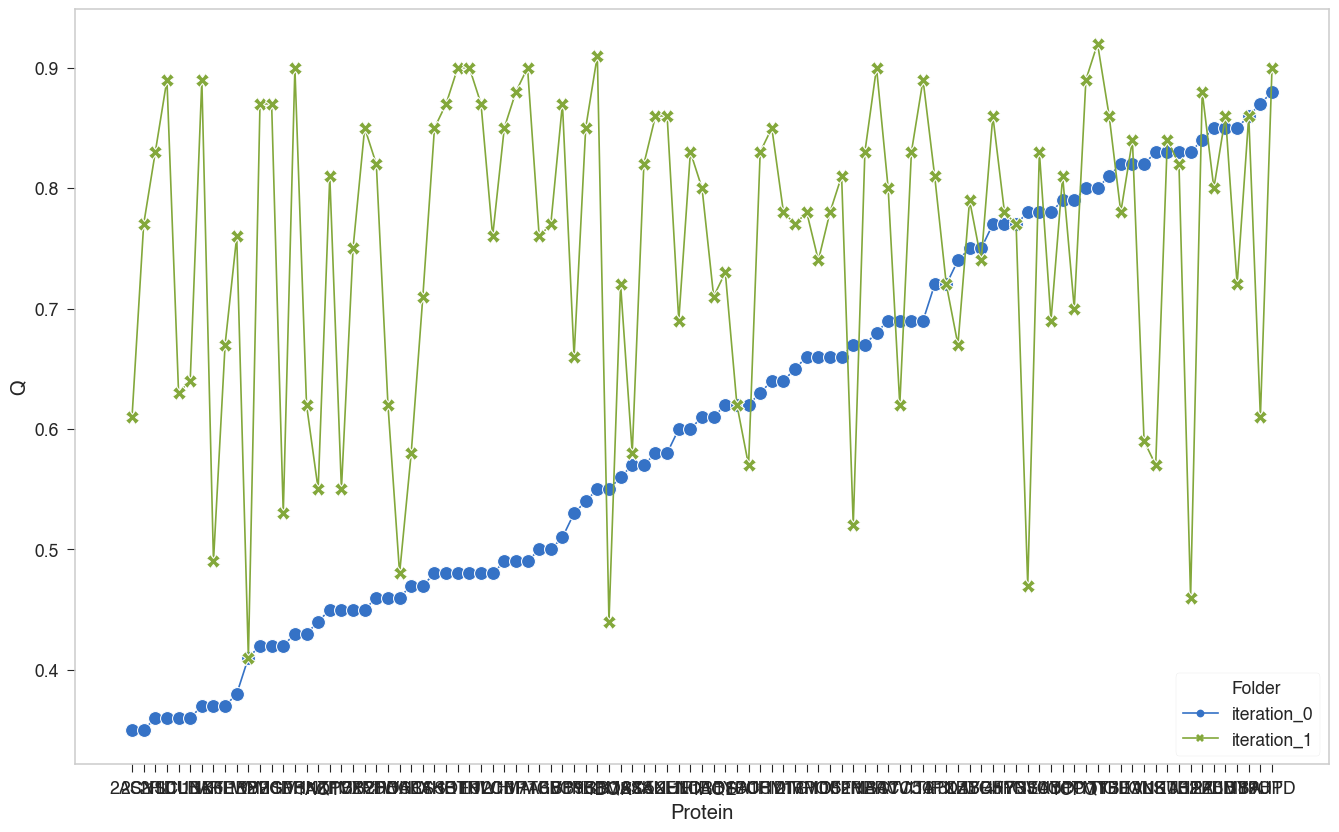

In [61]:
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False, sort=True)

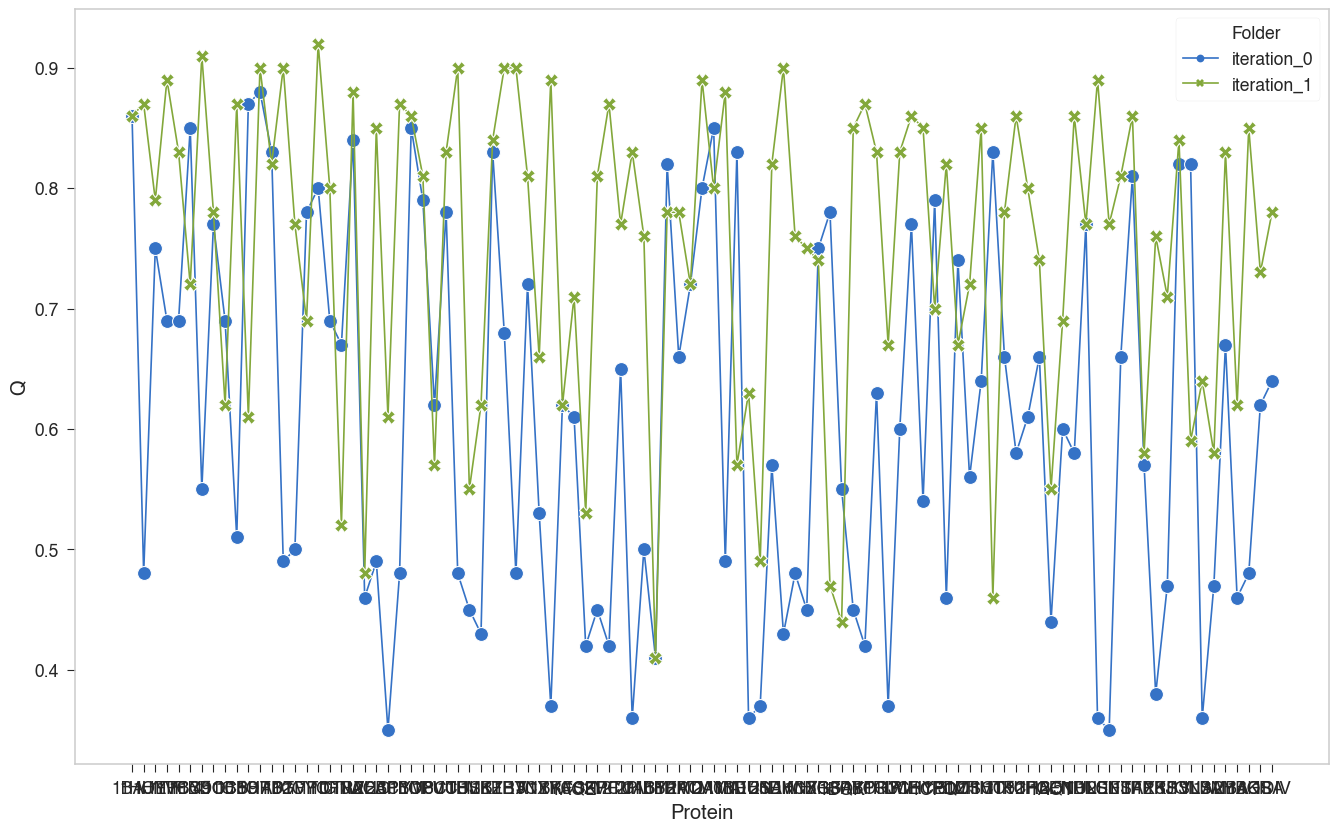

In [22]:

# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


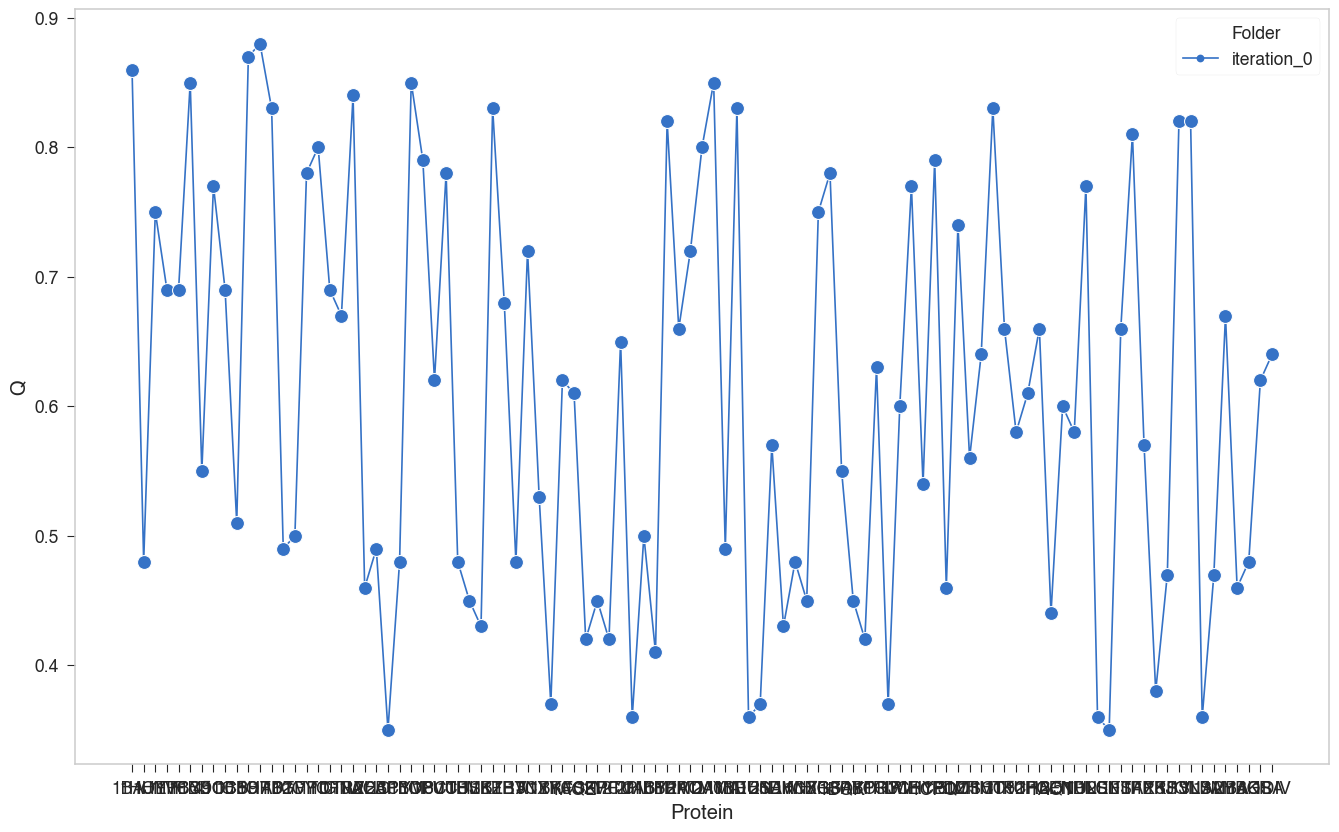

In [10]:

# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


In [165]:
pdb_list = dataset["optimization_cath"]
simulationType = "optimization_database"
run_n = 5
folder_list = ["iter0_gpu"]
all_data = []

for folder in folder_list:
    for pdb in pdb_list:
        for i in range(run_n):
                pre = f"/Users/weilu/Research/server/dec_2019/{simulationType}/{folder}/{pdb}/{i}"
                info_file = "info.dat"
                location = f"{pre}/{info_file}"
                try:
                    tmp = pd.read_csv(location, sep="\s+")
                    tmp = tmp.assign(Run=i, Protein=pdb, Folder=folder)
                    all_data.append(tmp)
                except:
                    print(pdb, i, folder)
                    pass
data = pd.concat(all_data)
today = datetime.today().strftime('%m-%d')
outFile = f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{today}.csv"
data.reset_index(drop=True).to_csv(outFile)
print(outFile)


/Users/weilu/Research/data/openMM/optimization_database_iter0_gpu_12-29.csv


In [167]:
data = pd.read_csv("/Users/weilu/Research/data/openMM/optimization_database_iter0_gpu_12-29.csv", index_col=0)
sub_pdb_list = pdb_list
data.Protein = pd.Categorical(data.Protein, 
                      categories=sub_pdb_list)

In [170]:
max_Q_data

Steps     Q     Rg  Backbone     Rama  Contact  Fragment  Membrane   ER  \
0     366  0.56  11.60    408.51  -574.28  -220.53   -202.01       0.0  0.0   
1     478  0.30  15.25    533.60  -758.93  -330.51   -274.89       0.0  0.0   
2     271  0.39  14.98    584.51  -793.09  -181.79   -237.88       0.0  0.0   
3     497  0.41  15.49    556.91 -1226.64  -328.39   -345.68       0.0  0.0   
4     447  0.46  13.25    369.69  -675.83  -179.42   -183.97       0.0  0.0   
5     336  0.69  11.34    361.05  -668.22  -163.57   -194.35       0.0  0.0   
6     478  0.59  10.54    231.20  -352.70  -150.07   -142.83       0.0  0.0   
7     181  0.36  17.51    892.96 -1120.93  -340.00   -323.41       0.0  0.0   
8     407  0.40  13.83    512.47  -855.85  -307.81   -259.17       0.0  0.0   
9     484  0.82  10.89    221.51  -556.43  -119.58   -171.95       0.0  0.0   
10    446  0.68  12.93    153.87  -275.61   -60.38    -85.50       0.0  0.0   
11    500  0.83   9.86    141.58  -301.40   -80.48   -107.35       0.0  0.0   
12    406  0.78  11.94    256.65  -457.75  -105.64   -169.22       0.0  0.0   
13    364  0.40  13.69    437.49  -762.61  -195.02   -222.52       0.0  0.0   
14    442  0.40  14.12    468.02 -1043.29  -260.68   -287.82       0.0  0.0   
15    461  0.73  11.17    263.81  -518.62  -128.63   -160.49       0.0  0.0   
16    485  0.63  11.88    341.95  -605.81  -195.26   -200.22       0.0  0.0   
17    182  0.47  15.13    733.34 -1085.91  -270.03   -313.92       0.0  0.0   
18    495  0.68  11.59    238.12  -436.30  -120.51   -153.13       0.0  0.0   
19    168  0.43  20.60    914.93 -1208.80  -281.06   -355.37       0.0  0.0   
20    437  0.65  14.47    493.29  -903.02  -266.94   -290.74       0.0  0.0   
21    401  0.72  11.66    270.38  -484.64  -127.43   -156.23       0.0  0.0   
22    296  0.56  13.19    378.41  -341.56  -135.57   -142.35       0.0  0.0   
23    284  0.44  13.10    434.58  -530.43  -172.48   -176.01       0.0  0.0   
24    382  0.80  12.87    283.79  -612.06  -136.34   -182.44       0.0  0.0   
25    490  0.70  12.60    274.80  -556.95  -149.63   -191.75       0.0  0.0   
26    453  0.84  13.36    169.70  -423.72   -59.95   -117.80       0.0  0.0   
27    290  0.76  11.24    326.89  -536.59  -128.89   -161.98       0.0  0.0   
28    478  0.58  12.52    301.63  -751.65  -191.98   -226.75       0.0  0.0   

    TBM_Q   Beta   Pap  Helical    Total  Run  Protein     Folder  
0     0.0 -24.93 -0.00      0.0  -613.24    0  1a75A00  iter0_gpu  
1     0.0 -27.71 -1.52      0.0  -859.96    0  1bekA01  iter0_gpu  
2     0.0 -30.24 -0.02      0.0  -658.51    4  1bqbA02  iter0_gpu  
3     0.0 -59.33 -0.00      0.0 -1403.12    2  1cpcB00  iter0_gpu  
4     0.0 -24.79 -0.00      0.0  -694.33    2  1cscA02  iter0_gpu  
5     0.0 -25.60 -0.00      0.0  -690.68    4  1cy5A00  iter0_gpu  
6     0.0 -19.35 -0.00      0.0  -433.75    0  1dv5A00  iter0_gpu  
7     0.0 -44.09 -1.14      0.0  -936.62    2  1e8yA05  iter0_gpu  
8     0.0 -40.74 -0.21      0.0  -951.30    4  1evyA02  iter0_gpu  
9     0.0 -28.40 -0.01      0.0  -654.85    3  1in4A03  iter0_gpu  
10    0.0 -11.71  0.00      0.0  -279.33    3  1l1fA03  iter0_gpu  
11    0.0 -18.13 -0.47      0.0  -366.24    0  1vq8P01  iter0_gpu  
12    0.0 -29.10 -1.50      0.0  -506.56    0  1xmkA00  iter0_gpu  
13    0.0 -30.81 -0.01      0.0  -773.48    0  1zcaA02  iter0_gpu  
14    0.0 -40.31 -0.00      0.0 -1164.09    3  2grhA00  iter0_gpu  
15    0.0 -23.37 -0.00      0.0  -567.30    2  2ii2A04  iter0_gpu  
16    0.0 -25.86 -0.80      0.0  -686.00    1  2q6fB03  iter0_gpu  
17    0.0 -47.65 -0.00      0.0  -984.17    2  2wh6A00  iter0_gpu  
18    0.0 -17.93 -0.00      0.0  -489.75    0  3g0vA00  iter0_gpu  
19    0.0 -49.50 -0.00      0.0  -979.79    0  3geuA00  iter0_gpu  
20    0.0 -39.15 -0.00      0.0 -1006.56    4  3h99A03  iter0_gpu  
21    0.0 -21.57 -0.00      0.0  -519.48    2  3hrdD02  iter0_gpu  
22    0.0 -14.94 -0.00      0.0  -256.02    4  3ju5A01  iter0_gpu  
2

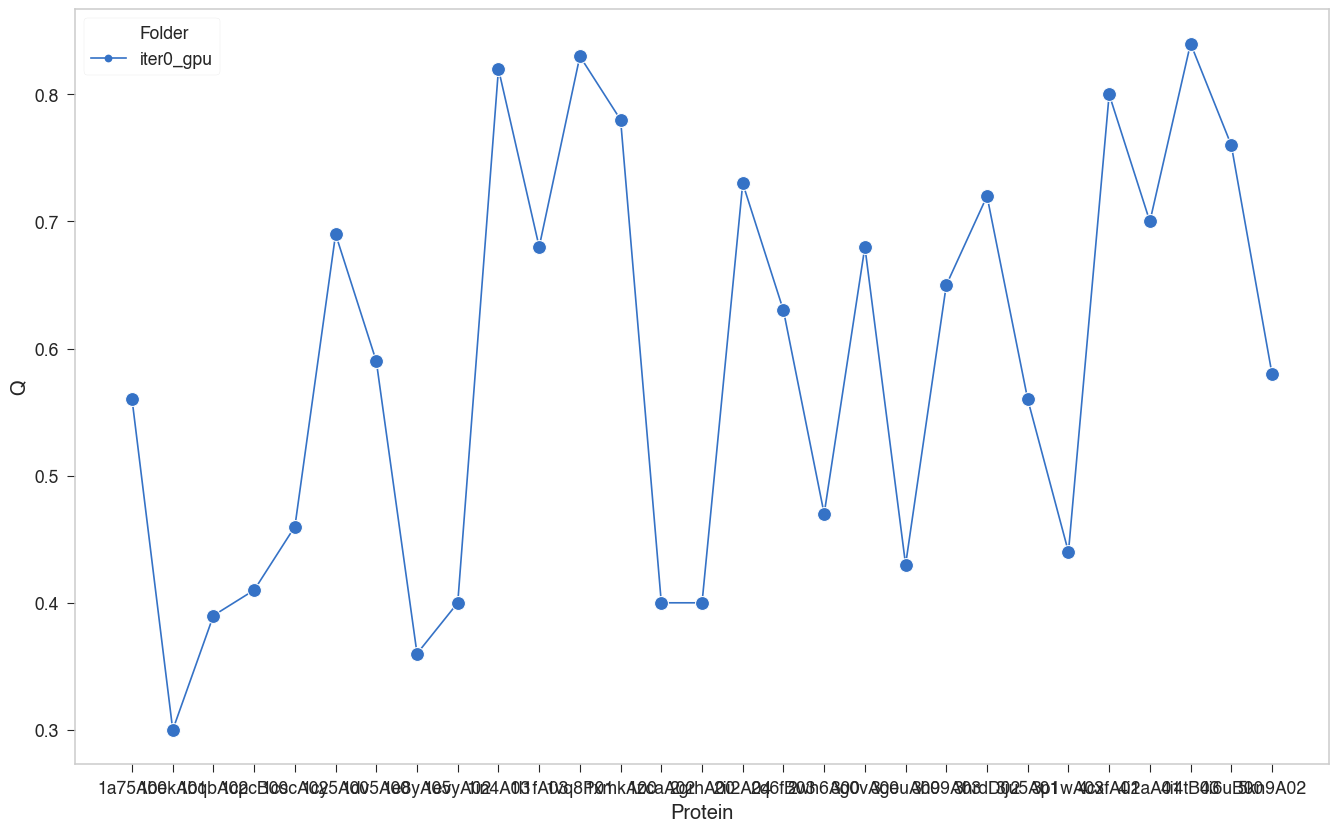

In [169]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
# d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
# d = data.query("Folder=='iter0_gpu_less_beta' or Folder == 'iter4_gpu'").reset_index(drop=True)
d = data
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


In [153]:
d = pd.read_csv("/Users/weilu/Research/server/dec_2019/iterative_optimization/original_pdbs/first_test_set.csv", index_col=0)
d = d.sort_values("Lpdb").reset_index(drop=True)
pdb_list = d.PDB.str.lower().to_list()

In [192]:
pdb_list = dataset["optimization"]
simulationType = "iterative_optimization"
# folder = "original"
# folder = "first"
# folder = "second_withoutExclusion"
# folder_list = ["first", "second_withoutExclusion"]
# "first", 
folder_list = ["iter7_gpu_long", "iter7_gpu", "iter6_gpu", "iter5_gpu", "iter5_withBiased_gpu", "iter0_gpu_less_beta", "iter4_gpu", "first_cpu2", "first_iter1_cpu4", "first_gpu", "iter2_gpu", "iter2_real_gpu", "iter3_gpu"]
all_data = []
for folder in folder_list:
    for pdb in pdb_list:
        for i in range(10):
                pre = f"/Users/weilu/Research/server/dec_2019/{simulationType}/{folder}/{pdb}/{i}"
                info_file = "info.dat"
                location = f"{pre}/{info_file}"
                try:
                    tmp = pd.read_csv(location, sep="\s+")
                    tmp = tmp.assign(Run=i, Protein=pdb, Folder=folder)
                    all_data.append(tmp)
                except:
                    print(pdb, i, folder)
                    pass
data = pd.concat(all_data)
today = datetime.today().strftime('%m-%d')
outFile = f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{today}.csv"
data.reset_index(drop=True).to_csv(outFile)
print(outFile)

/Users/weilu/Research/data/openMM/iterative_optimization_iter3_gpu_01-03.csv


In [4]:
data = pd.read_csv("/Users/weilu/Research/data/openMM/iterative_optimization_iter3_gpu_01-03.csv", index_col=0)

/Users/weilu/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [194]:
sub_pdb_list = pdb_list
data.Protein = pd.Categorical(data.Protein, 
                      categories=sub_pdb_list)

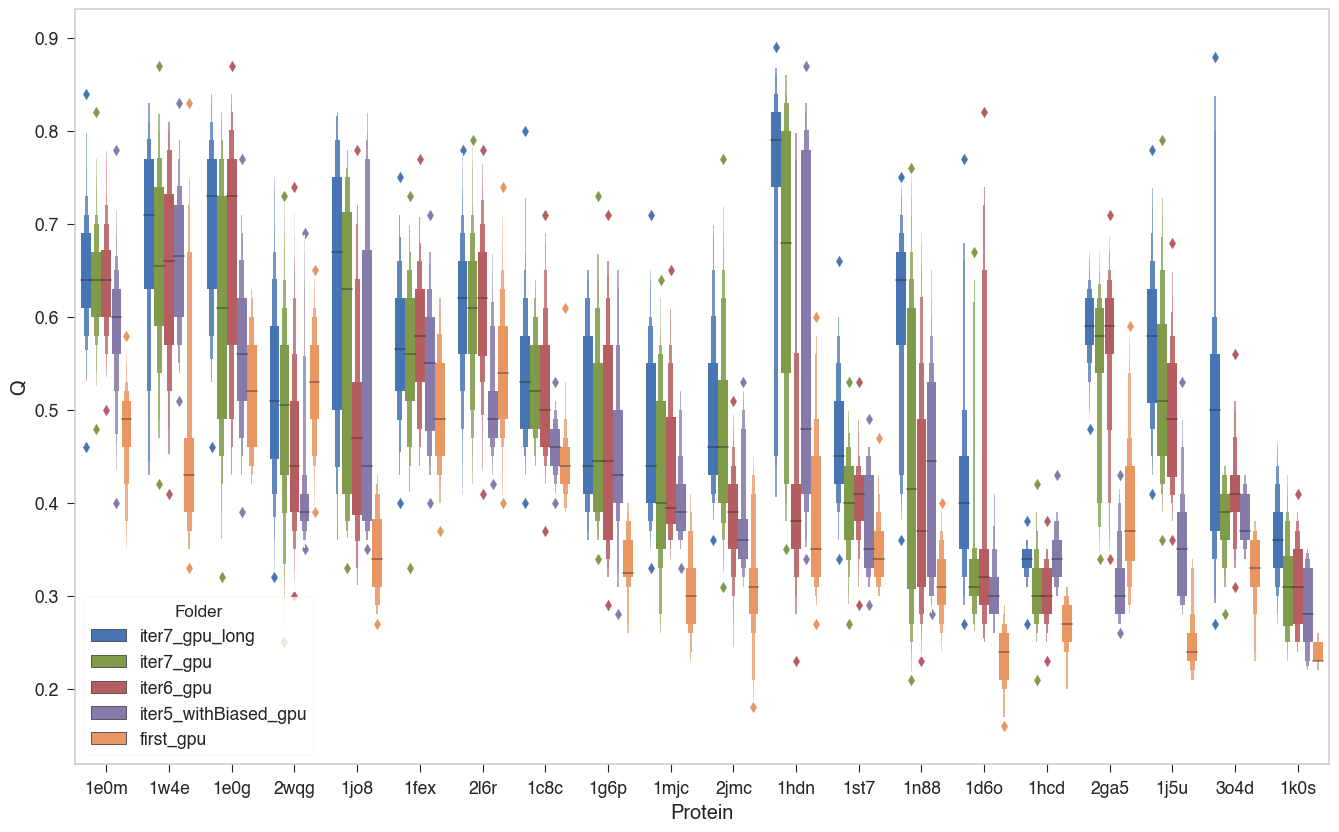

In [196]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
# d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
d = data.query("Folder == 'iter7_gpu_long' or Folder == 'iter5_withBiased_gpu' or Folder == 'first_gpu' or Folder == 'iter6_gpu' or Folder == 'iter7_gpu'").reset_index(drop=True)
#
t = d.groupby(["Protein", "Run", "Folder"]).tail(20)
ax = sns.boxenplot(x="Protein", y=y, hue="Folder", data=t)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


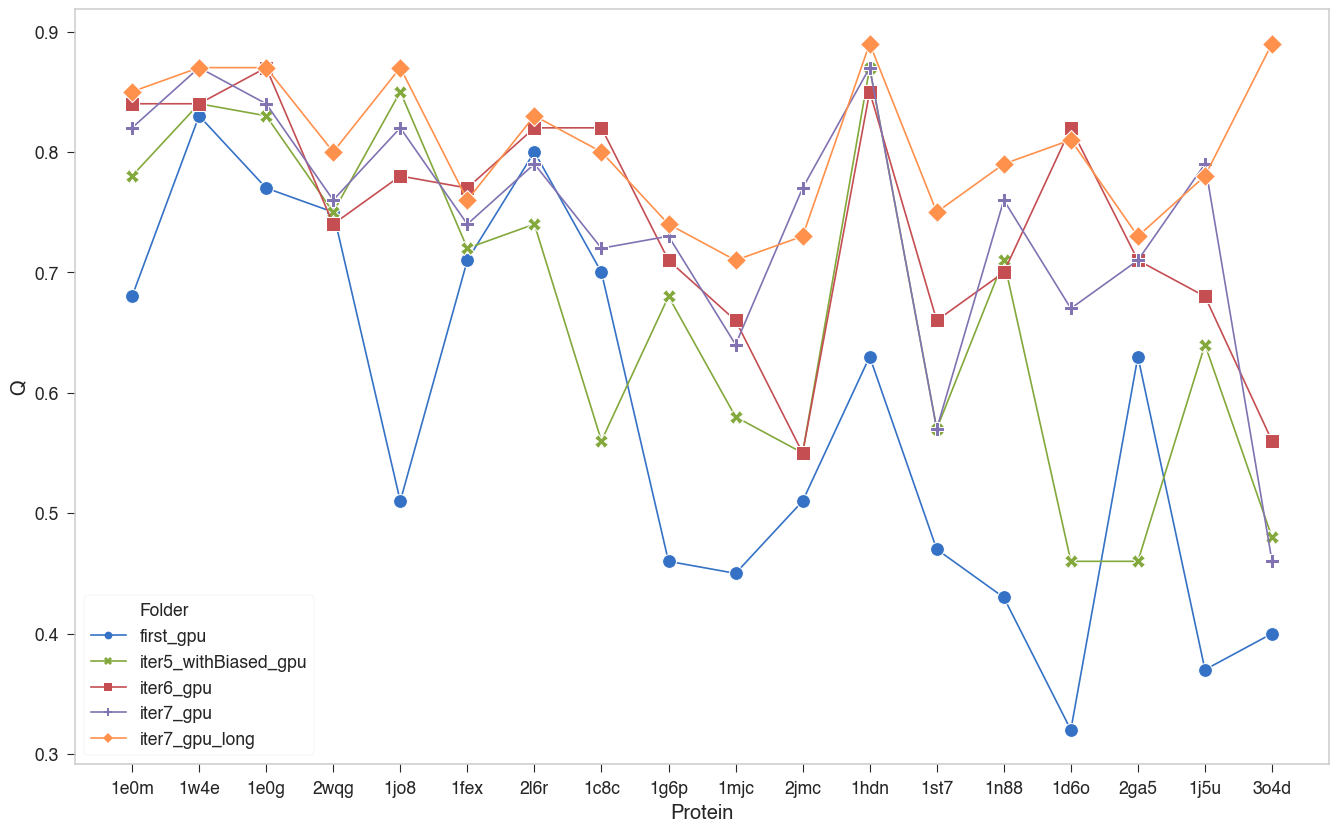

In [5]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
# d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
# d = data.query("Folder=='iter0_gpu_less_beta' or Folder == 'iter4_gpu'").reset_index(drop=True)
d = data.query("Folder == 'iter7_gpu_long' or Folder == 'iter5_withBiased_gpu' or Folder == 'first_gpu' or Folder == 'iter6_gpu' or Folder == 'iter7_gpu'").reset_index(drop=True)
# d = data
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
sub_data = max_Q_data.query("Protein != '1hcd'").reset_index(drop=True)
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
dataset["optimization_v2"] = ['1e0m', '1w4e', '1e0g', '2wqg', '1jo8', '1fex', '2l6r', '1c8c', '1g6p', '1mjc', '2jmc', '1hdn', '1st7', '1n88', '1d6o', '2ga5', '1j5u', '3o4d']

sub_data.Protein = pd.Categorical(sub_data.Protein, 
                      categories=dataset["optimization_v2"])
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


In [ ]:
sub_data

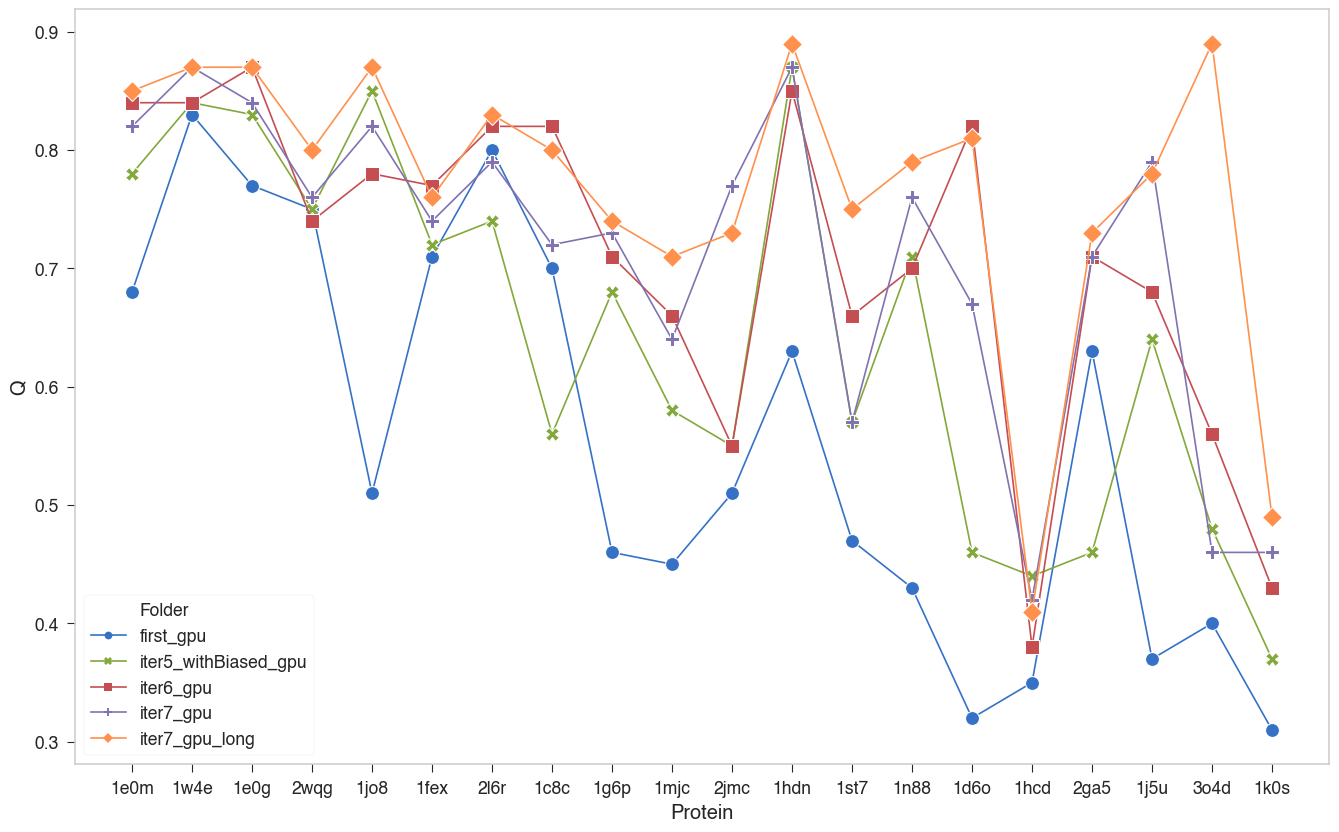

In [195]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
# d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
# d = data.query("Folder=='iter0_gpu_less_beta' or Folder == 'iter4_gpu'").reset_index(drop=True)
d = data.query("Folder == 'iter7_gpu_long' or Folder == 'iter5_withBiased_gpu' or Folder == 'first_gpu' or Folder == 'iter6_gpu' or Folder == 'iter7_gpu'").reset_index(drop=True)
# d = data
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


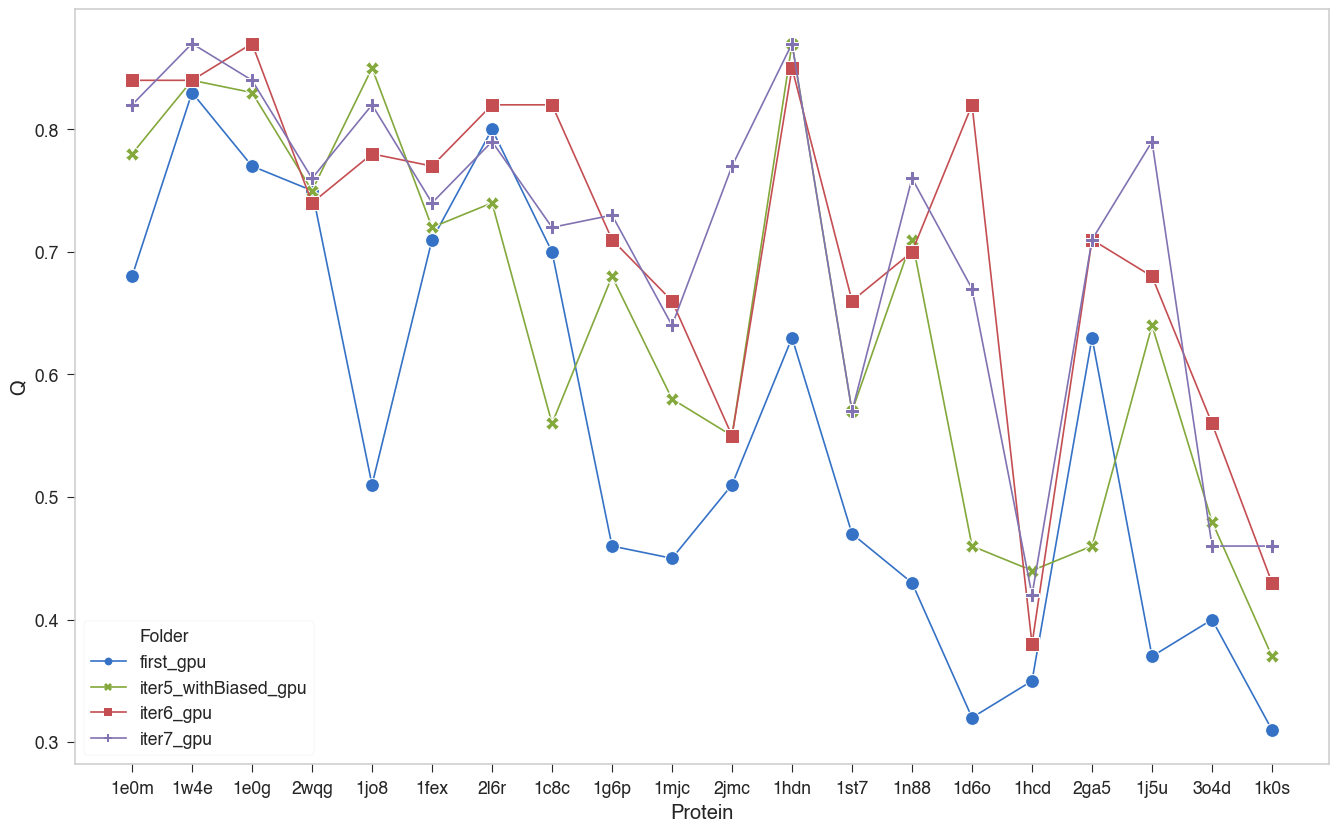

In [191]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
# d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
# d = data.query("Folder=='iter0_gpu_less_beta' or Folder == 'iter4_gpu'").reset_index(drop=True)
d = data.query("Folder == 'iter5_withBiased_gpu' or Folder == 'first_gpu' or Folder == 'iter6_gpu' or Folder == 'iter7_gpu'").reset_index(drop=True)
# d = data
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


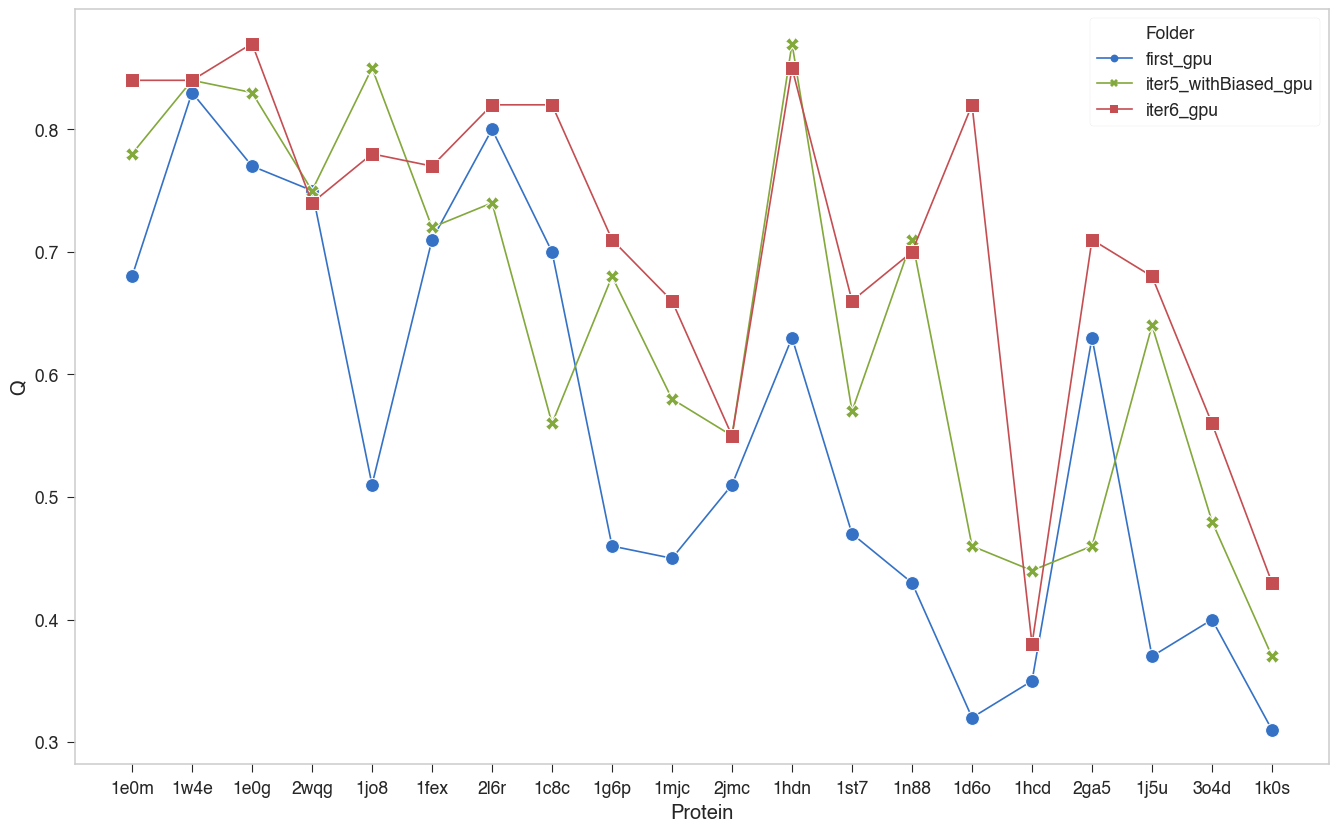

In [185]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
# d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
# d = data.query("Folder=='iter0_gpu_less_beta' or Folder == 'iter4_gpu'").reset_index(drop=True)
d = data.query("Folder == 'iter5_withBiased_gpu' or Folder == 'first_gpu' or Folder == 'iter6_gpu'").reset_index(drop=True)
# d = data
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


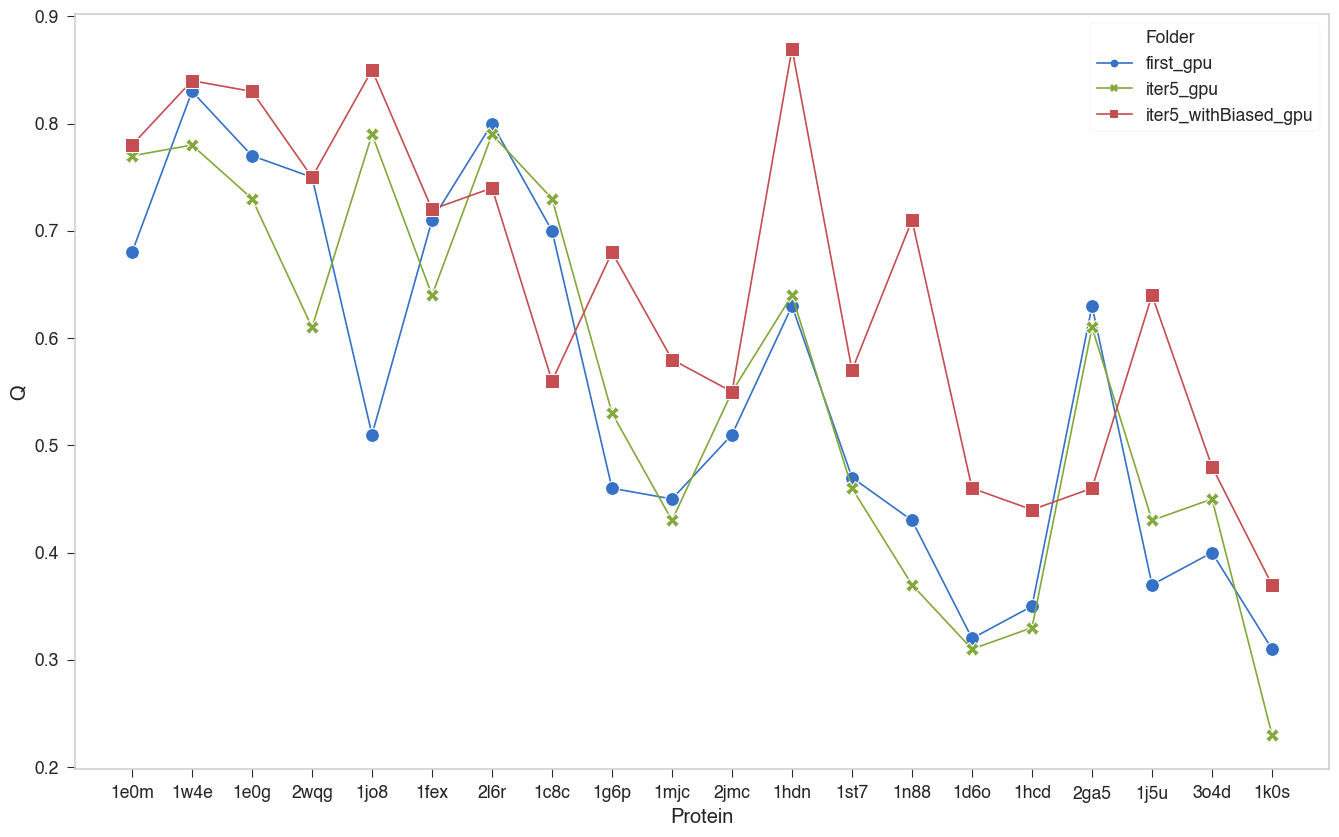

In [184]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
# d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
# d = data.query("Folder=='iter0_gpu_less_beta' or Folder == 'iter4_gpu'").reset_index(drop=True)
d = data.query("Folder=='iter5_gpu' or Folder == 'iter5_withBiased_gpu' or Folder == 'first_gpu'").reset_index(drop=True)
# d = data
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


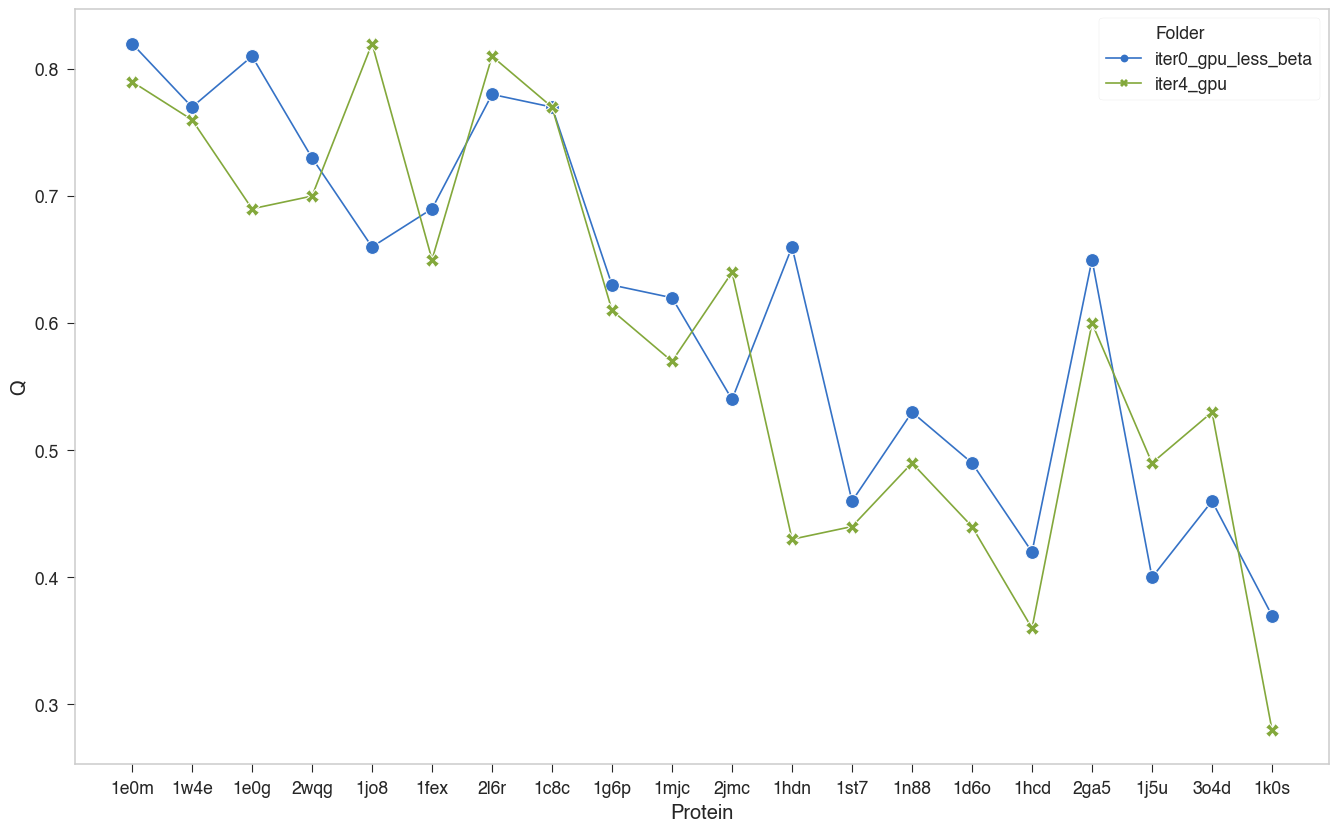

In [160]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
# d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
d = data.query("Folder=='iter0_gpu_less_beta' or Folder == 'iter4_gpu'").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


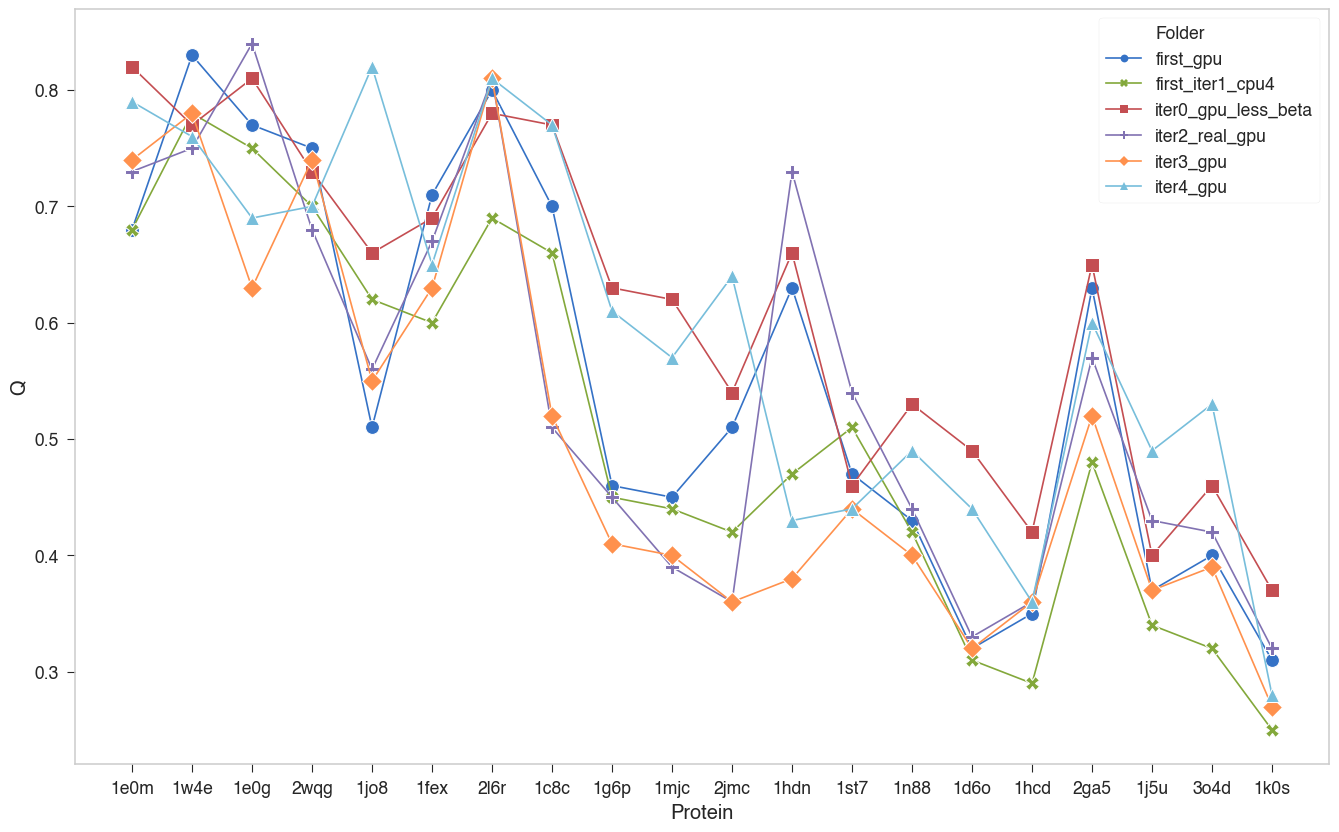

In [161]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
# d = data.query("Folder=='iter0_gpu_less_beta' or Folder == 'iter4_gpu'").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


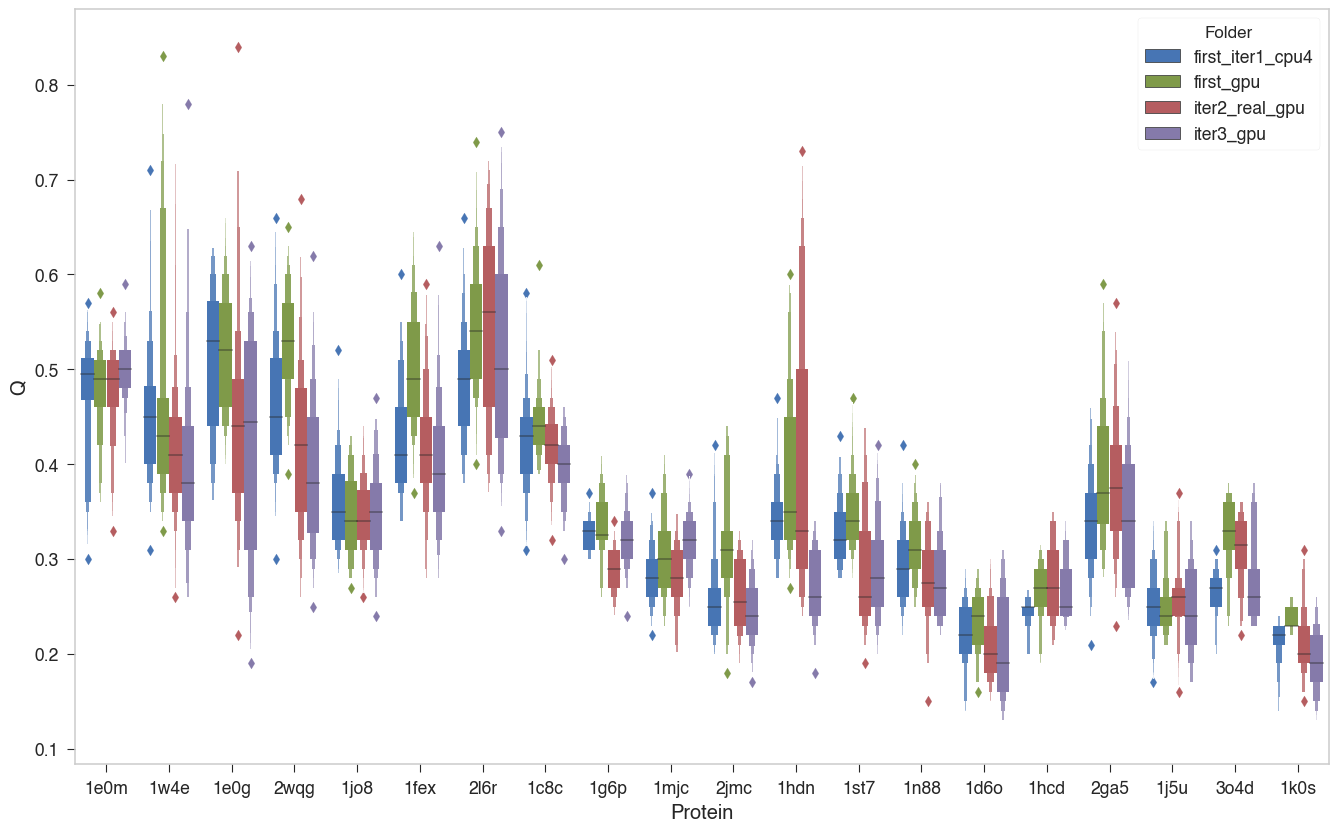

In [149]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
t = d.groupby(["Protein", "Run", "Folder"]).tail(20)
ax = sns.boxenplot(x="Protein", y=y, hue="Folder", data=t)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


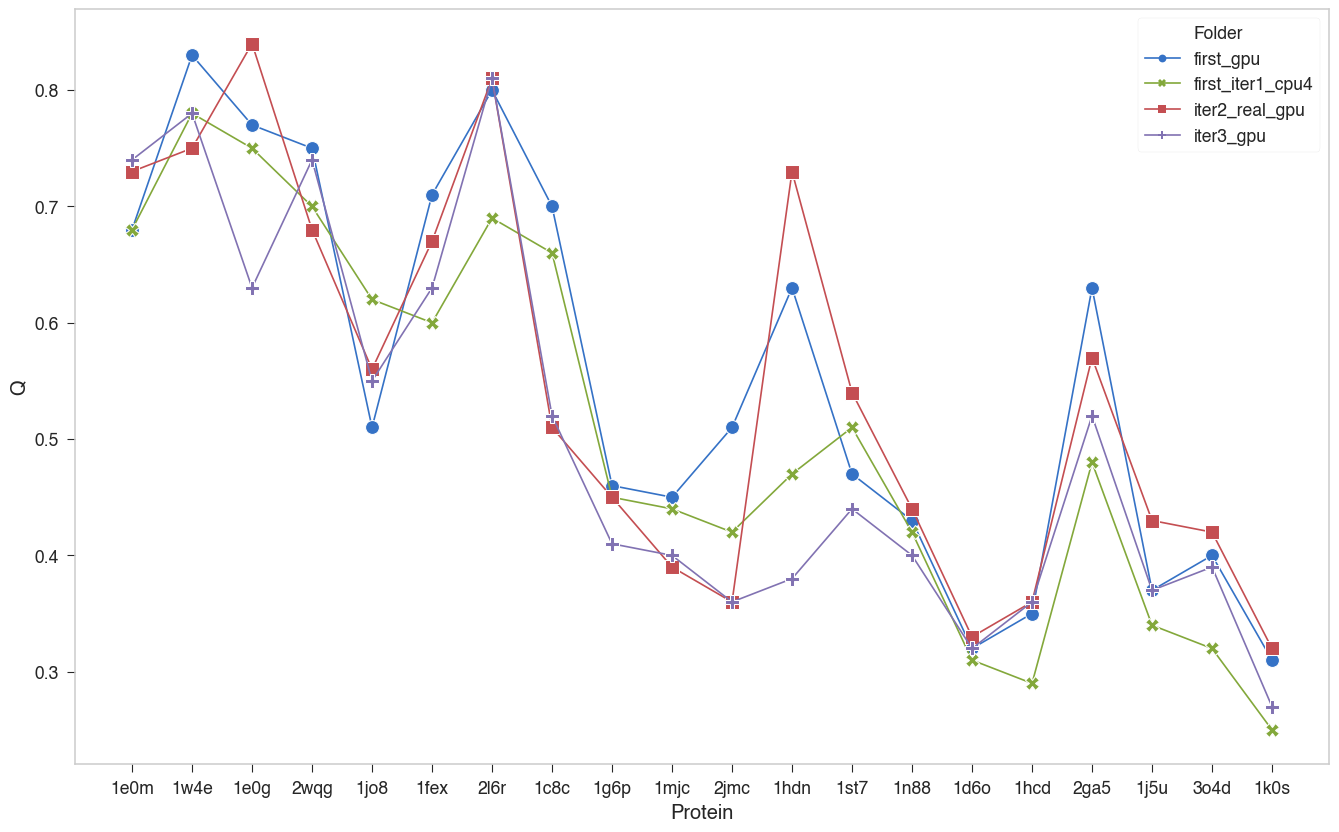

In [144]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


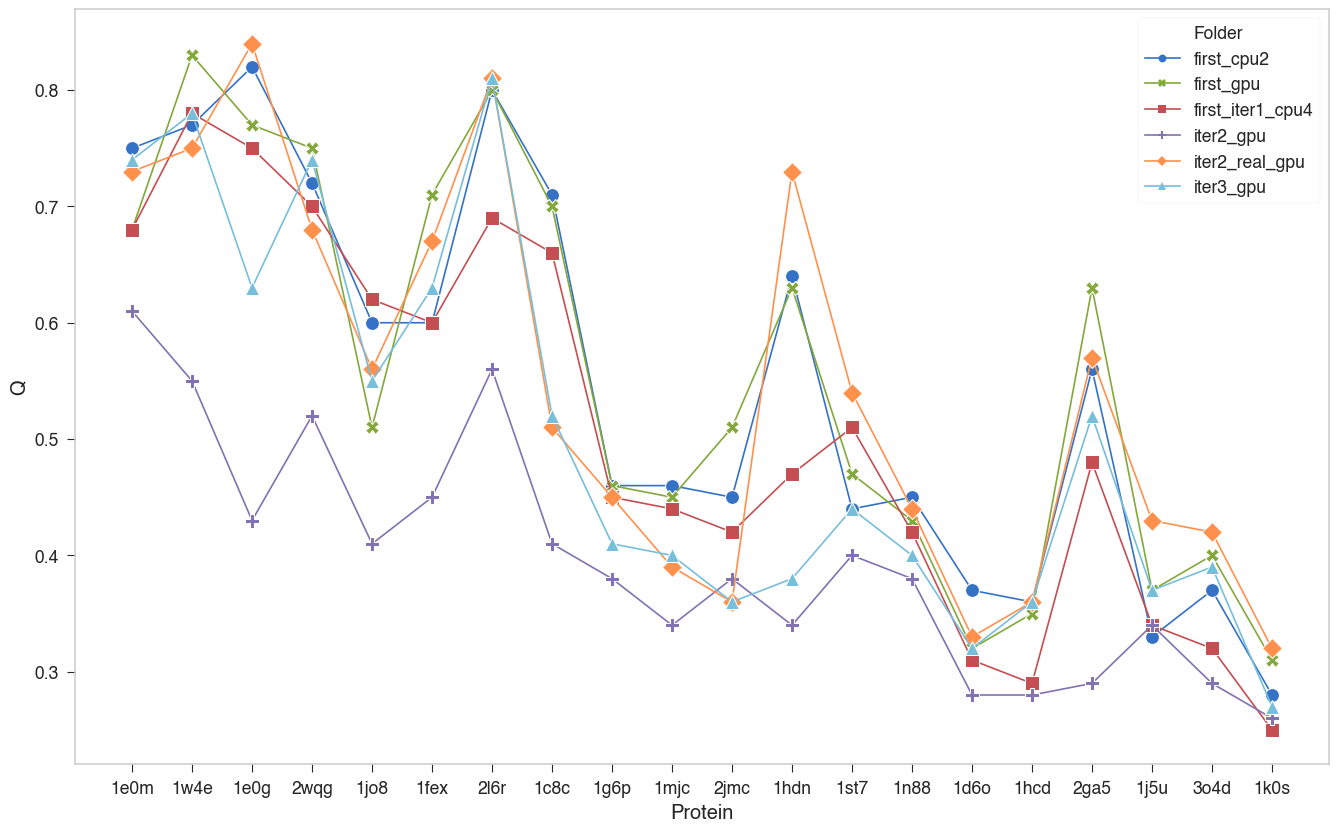

In [140]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
d = data.query("Folder != 'iter2_gpu'")
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


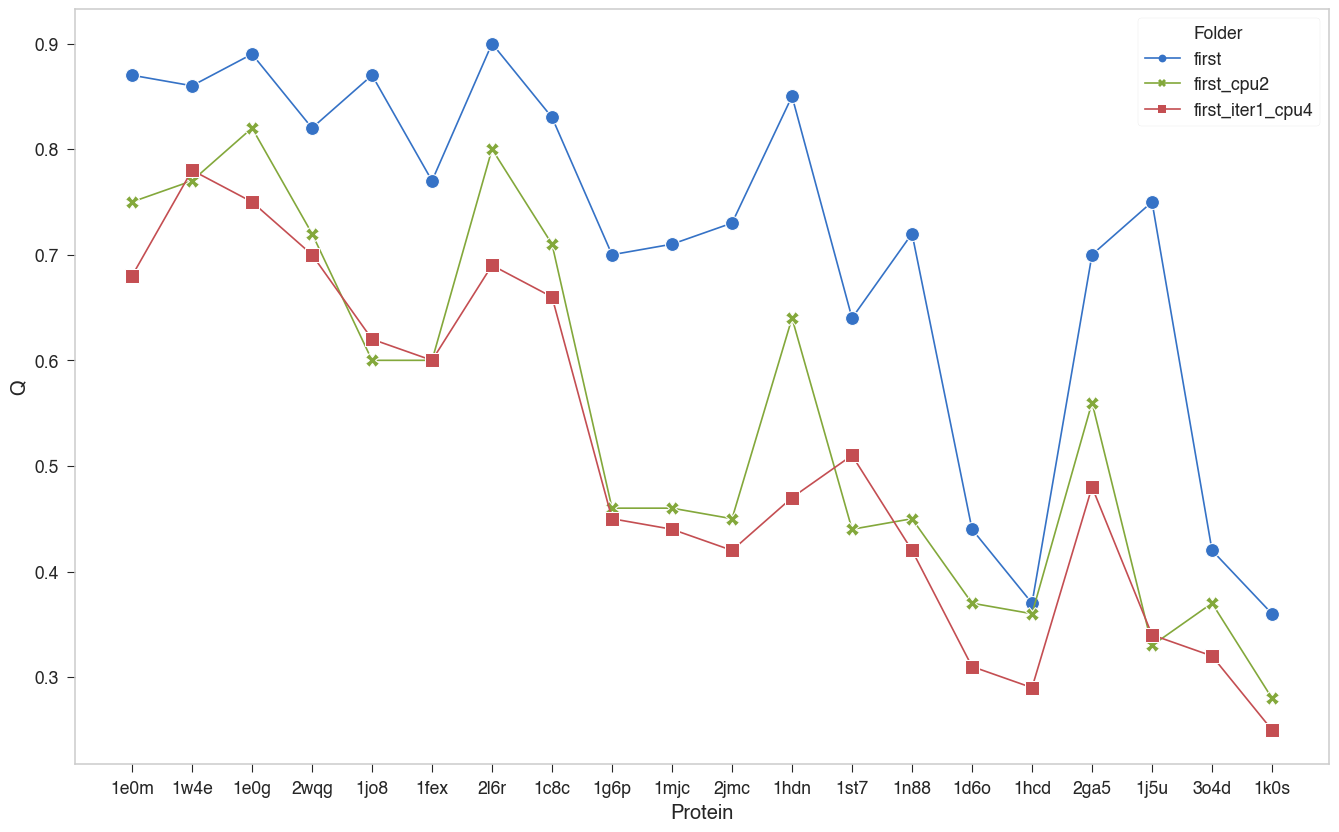

In [121]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
d = data
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


In [ ]:
y = "Steps"
# d = data.query("Steps > 1500").reset_index(drop=True)
d = data
t = d.groupby(["Protein", "Folder", "Run"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


# CPU, thread 1

In [ ]:
data = pd.read_csv("/Users/weilu/Research/data/openMM/iterative_optimization_first_12-14.csv", index_col=0)
sub_pdb_list = pdb_list
data.Protein = pd.Categorical(data.Protein, 
                      categories=sub_pdb_list)

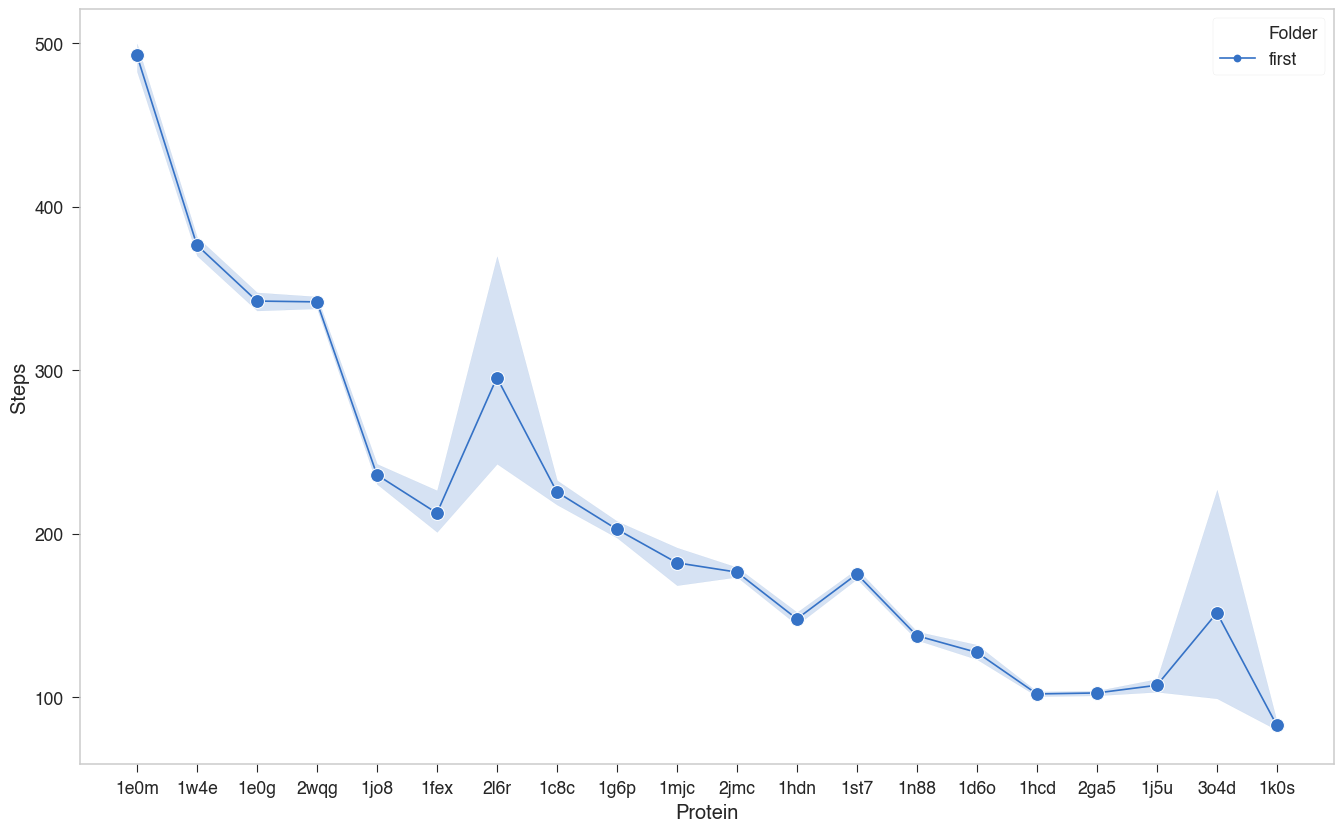

In [24]:
y = "Steps"
# d = data.query("Steps > 1500").reset_index(drop=True)
d = data
t = d.groupby(["Protein", "Folder", "Run"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


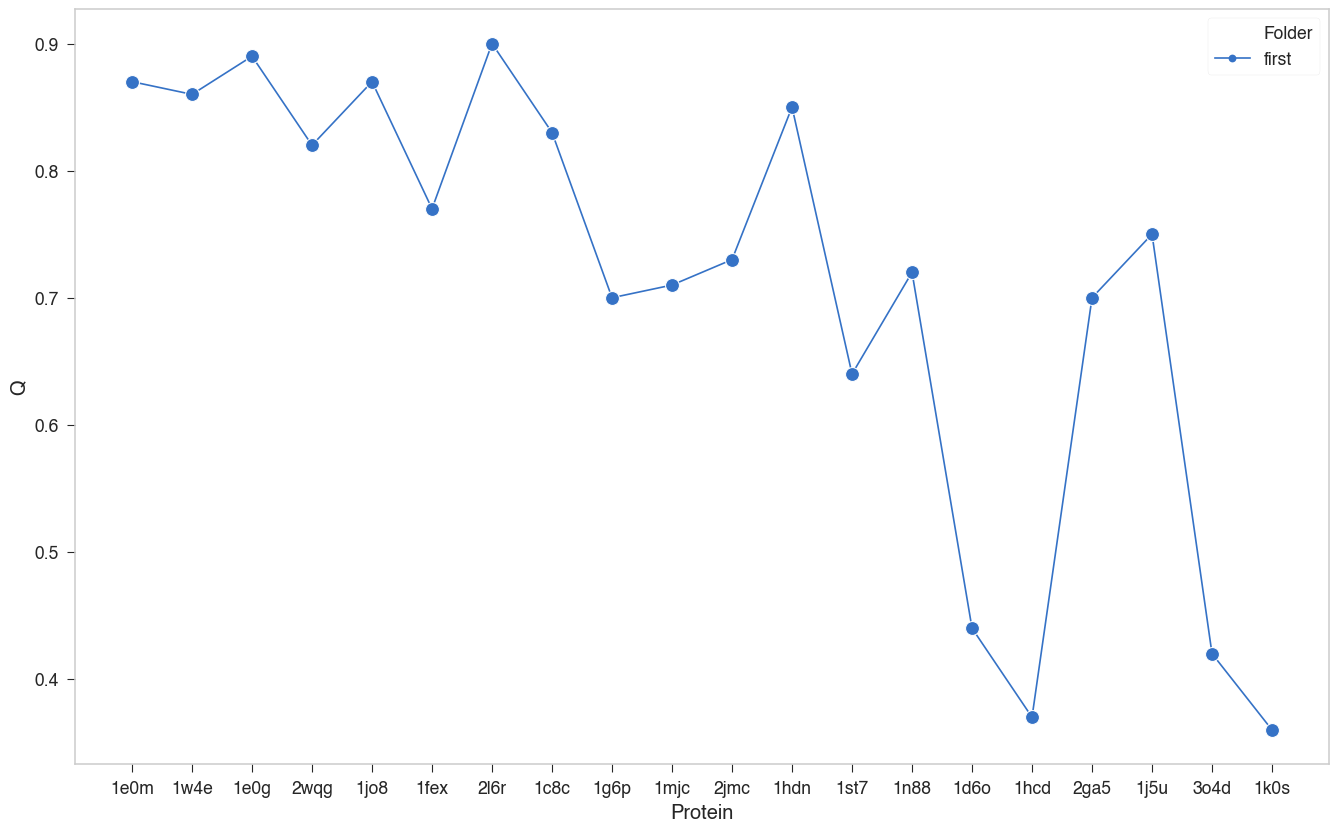

In [21]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
d = data
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


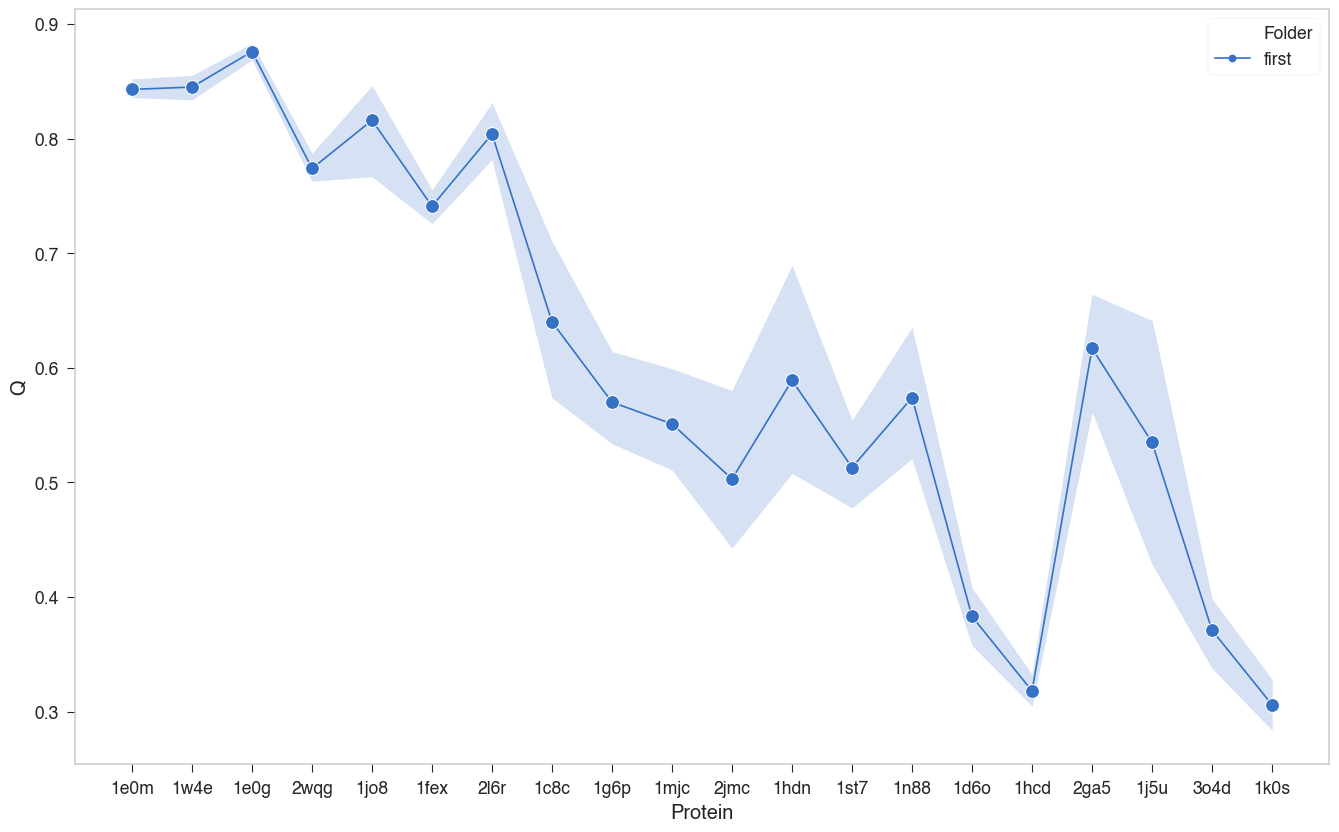

In [27]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
d = data
t = d.groupby(["Protein", "Folder", "Run"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


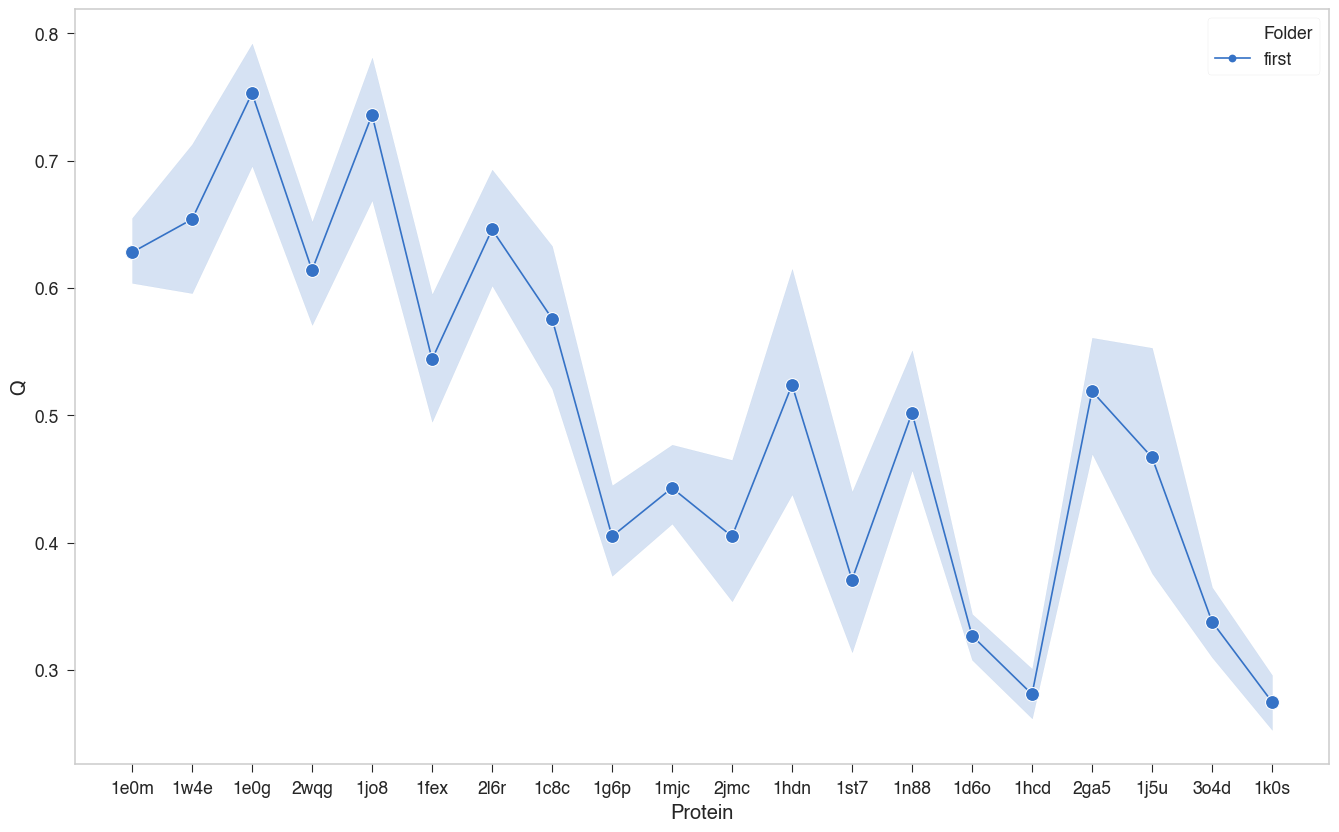

In [28]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
d = data
t = d.groupby(["Protein", "Folder", "Run"])["Steps"].idxmax().reset_index()
max_Q_data = d.iloc[t["Steps"].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


In [16]:
data

Steps     Q     Rg  Backbone    Rama  Contact  Fragment  Membrane   ER  \
0          0  0.05  36.04     68.02 -111.94   -21.21    -13.23       0.0  0.0   
1          1  0.10  33.51      1.35 -118.56   -33.90    -21.35       0.0  0.0   
2          2  0.20  22.52    193.61  -61.70   -28.71    -37.44       0.0  0.0   
3          3  0.15  20.12    214.98  -83.38   -29.58    -30.61       0.0  0.0   
4          4  0.26  17.40    202.66  -80.84   -29.53    -42.52       0.0  0.0   
5          5  0.32  17.36    237.12  -81.77   -30.40    -43.85       0.0  0.0   
6          6  0.35  13.83    193.53  -75.48   -29.74    -48.77       0.0  0.0   
7          7  0.31  11.38    209.04  -75.46   -30.34    -39.83       0.0  0.0   
8          8  0.28  14.80    201.89  -66.88   -31.54    -42.82       0.0  0.0   
9          9  0.30  18.44    213.88  -63.19   -30.29    -48.24       0.0  0.0   
10        10  0.33  17.25    224.73  -76.77   -29.93    -48.51       0.0  0.0   
11        11  0.32  14.94    216.67  -64.24   -29.71    -46.80       0.0  0.0   
12        12  0.31  14.53    216.29  -74.71   -30.91    -42.52       0.0  0.0   
13        13  0.31  18.14    200.53  -66.42   -28.62    -46.56       0.0  0.0   
14        14  0.38  11.11    201.16  -64.05   -32.61    -46.30       0.0  0.0   
15        15  0.33  11.73    213.63  -74.41   -32.29    -40.14       0.0  0.0   
16        16  0.50  10.78    193.64  -75.89   -35.98    -50.87       0.0  0.0   
17        17  0.45  11.55    215.44  -80.24   -33.30    -52.92       0.0  0.0   
18        18  0.57  10.33    179.26  -74.30   -29.23    -54.20       0.0  0.0   
19        19  0.53   9.85    159.16  -86.94   -36.67    -51.08       0.0  0.0   
20        20  0.57   9.70    189.18  -84.97   -34.21    -55.71       0.0  0.0   
21        21  0.53  10.87    207.76  -68.66   -32.55    -55.63       0.0  0.0   
22        22  0.59   9.72    203.41  -82.07   -35.50    -57.64       0.0  0.0   
23        23  0.68   9.78    188.21  -72.73   -34.19    -55.21       0.0  0.0   
24        24  0.64   9.96    211.36  -79.77   -33.71    -63.32       0.0  0.0   
25        25  0.65   9.89    222.12  -86.93   -35.93    -58.56       0.0  0.0   
26        26  0.68   9.52    168.49  -83.48   -33.21    -60.33       0.0  0.0   
27        27  0.72   9.07    209.63  -84.38   -36.18    -61.44       0.0  0.0   
28        28  0.54  10.83    226.00  -75.01   -34.56    -56.70       0.0  0.0   
29        29  0.69   9.86    206.89  -76.79   -36.37    -64.11       0.0  0.0   
...      ...   ...    ...       ...     ...      ...       ...       ...  ...   
42376     45  0.19  25.73    780.42 -428.77  -227.53   -234.46       0.0  0.0   
42377     46  0.21  22.63    891.06 -437.32  -234.44   -251.03       0.0  0.0   
42378     47  0.21  20.61    845.80 -442.51  -225.29   -245.23       0.0  0.0   
42379     48  0.18  20.78    872.71 -430.17  -254.79   -236.21       0.0  0.0   
42380     49  0.20  18.76    879.36 -408.75  -260.47   -227.67       0.0  0.0   
42381     50  0.22  18.43    856.17 -439.06  -234.71   -235.84       0.0  0.0   
42382     51  0.22  17.59    796.16 -434.52  -249.91   -237.90       0.0  0.0   
42383     52  0.24  16.10    808.36 -424.59  -264.71   -235.35       0.0  0.0   
42384     53  0.29  14.72    826.68 -431.99  -329.03   -233.93       0.0  0.0   
42385     54  0.30  14.28    842.07 -435.49  -351.71   -234.37       0.0  0.0   
42386     55  0.32  14.28    846.51 -409.18  -363.74   -239.56       0.0  0.0   
42387     56  0.32  14.38    803.47 -452.69  -339.00   -245.28       0.0  0.0   
42388     57  0.32  14.44    866.53 -436.85  -320.88   -249.16       0.0  0.0   
42389     58  0.33  14.94    826.33 -418.03  -313.50   -252.50       0.0  0.0   
42390     59  0.31  14.85    773.55 -395.37  -360.85   -240.87       0.0  0.0   
42391     60  0.31  14.41    774.87 -409.17  -316.67   -249.46       0.0  0.0   
42392     61  0.30  14.63    850.36 -410.72  -370.97   -244.40       0.0  0.0   
42393     62  0.31  14.15    858.83 -4

In [30]:
parser = PDBParser()

In [35]:
movie_dcd = "/Users/weilu/Research/server/dec_2019/iterative_optimization/first/2wqg/4/movie.dcd"

In [36]:
s = parser.get_structure("X", movie_dcd)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 20: invalid start byte

In [31]:
movie = "/Users/weilu/Research/server/dec_2019/iterative_optimization/first/2wqg/4/movie.pdb"

In [37]:
movie = "/Users/weilu/Research/server/dec_2019/iterative_optimization/first/2wqg/0/movie.pdb"

In [38]:
s = parser.get_structure("X", movie)

In [45]:

complete_models = []
for i in range(10):
    movie = f"/Users/weilu/Research/server/dec_2019/iterative_optimization/first/2wqg/{i}/movie.pdb"
    s = parser.get_structure("X", movie)
    complete_models += list(s.get_models())

In [65]:
t = data.query("Protein == '2wqg' and Steps > 1").reset_index(drop=True)
t = t.rename(columns={"Q":"Qw"})

In [49]:
len(complete_models)

3409

In [73]:
print(pdb_list)

['1e0m', '1w4e', '1e0g', '2wqg', '1jo8', '1fex', '2l6r', '1c8c', '1g6p', '1mjc', '2jmc', '1hdn', '1st7', '1n88', '1d6o', '1hcd', '2ga5', '1j5u', '3o4d', '1k0s']


In [ ]:
folder_list = ["first"]
folder = "first"
pre = f"/scratch/wl45/dec_2019/iterative_optimization/{folder}"
to_folder = "."
os.system(f"mkdir -p {to_folder}/decoys/openMM")
complete_models = []
for pdb in pdb_list:
    for i in range(10):
        movie = f"{pre}/{pdb}/{i}/movie.pdb"
        s = parser.get_structure("X", movie)
        complete_models += list(s.get_models())
    t = data.query(f"Protein == '{pdb}' and Steps > 1").reset_index(drop=True)
    t["structure"] = complete_models
    t = t.rename(columns={"Q":"Qw"})
    last50 = t.groupby("Run").tail(50).reset_index(drop=True)
    to_folder = "."
    last50.to_pickle(f"{to_folder}/decoys/openMM/{folder}_{pdb}")

In [75]:
folder_list = ["first"]
folder = "first"
pdb = "1w4e"
pre = f"/Users/weilu/Research/server/dec_2019/iterative_optimization/{folder}"
complete_models = []
for i in range(10):
    movie = f"{pre}/{pdb}/{i}/movie.pdb"
    s = parser.get_structure("X", movie)
    complete_models += list(s.get_models())
t = data.query(f"Protein == '{pdb}' and Steps > 1").reset_index(drop=True)
t["structure"] = complete_models
t = t.rename(columns={"Q":"Qw"})

In [76]:
len(t)

3756

In [77]:
len(complete_models)

3756

In [112]:
t = pd.read_pickle("/Users/weilu/Research/server/dec_2019/multiDensityOptimization/optimization_iteration1/optimization/decoys/openMM/1c8c_first.pkl")

In [113]:
structures = t["structure"].to_list()

In [89]:
print(structures[0])

<Model id=172>


In [114]:
all_res = list(structures[0].get_residues())

In [115]:
all_res[0]

<Residue MET het=  resseq=1 icode= >

In [116]:
is_hetero(all_res[0])

False

In [ ]:
all_res

In [96]:
all_res[0].id[0]

'H_NGP'

In [70]:
last50 = t.groupby("Run").tail(50).reset_index(drop=True)

In [ ]:
to_folder = "."
last50.to_pickle(f"{to_folder}/decoys/openMM/{folder}_{pdb}")

In [55]:
t["structure"] = complete_models

In [ ]:
sampled["structure"] = sampled.apply(getStructures, all_movies=all_movies, axis=1)

In [ ]:
import io
from Bio.PDB.PDBParser import PDBParser
simulation_location, name = args.label.split("__")
simulation_location_name = f"{simulation_location}_{name}"

def getStructures(x, all_movies):
    index = int(x["index"])+1
    run = int(x["Run"])

    start = index * size
    end = (index + 1) * size
    f = io.StringIO("".join(all_movies[run][start:end]))
    parser = PDBParser()
    return parser.get_structure(f"{index}", f)

a = pd.read_csv(f"{database_location}/Q_{simulation_location_name}", index_col=0).query(f"Rank < {decoy_n*3}")
sampled = a.sample(decoy_n)
all_movies = {}
for i in sampled["Run"].unique():
    with open(f"{database_location}/{simulation_location_name}_{i}/movie.pdb") as f:
        movie = f.readlines()
    all_movies[i] = movie
size = 0
for line in movie:
    size += 1
    if line == "ENDMDL\n":
        break
print(simulation_location_name, size)
sampled["structure"] = sampled.apply(getStructures, all_movies=all_movies, axis=1)
sampled["Qw"] = sampled[" Qw"].round(3)
sampled.drop(" Qw", axis=1)
sampled.to_pickle(f"decoys/lammps/{name}_{simulation_location}.pkl")

In [ ]:
a